### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns="EIN")
application_df = application_df.drop(columns="NAME")
application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [5]:
# Determine the number of unique values in each column.
u_values = application_df.nunique()
u_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
u_values_at = application_df.APPLICATION_TYPE.value_counts()
u_values_at

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

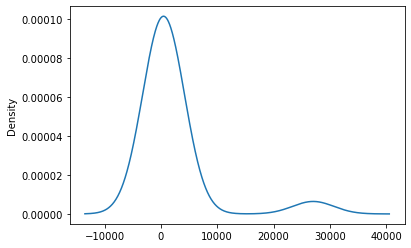

In [7]:
# Visualize the value counts of APPLICATION_TYPE
u_values_at.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(u_values_at[u_values_at < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
u_values_class = application_df.CLASSIFICATION.value_counts()
u_values_class

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C1245        1
C2380        1
C8210        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

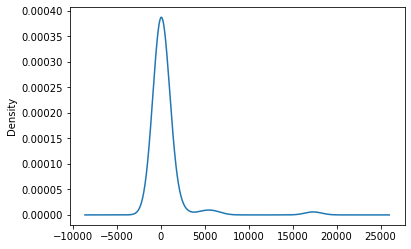

In [10]:
# Visualize the value counts of CLASSIFICATION
u_values_class.plot.density()

In [19]:
# Determine which values to replace if counts are less than ..?
replace_class = list(u_values_class[u_values_class < 5000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
Other    10899
C2000     6074
Name: CLASSIFICATION, dtype: int64

In [27]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                     1.0                   0.0                  0.0   
1                     0.0                   0.0                  1.0   
2                     0.0                   0.0                  0.0   
3                     0.0                   0.0                  1.0   
4                     0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  AFFILIATION_Family/Parent  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           1.0                        0.0   
3                           1.0                        0.0   
4                           0.0                        0.0   

   AFFILIATION_Independent  AFFILIATION_National  ...  INCOME_AMT_1-9999  \
0                      1.0                   0.0  ...                0.0   
1                      1.0                   0.0  ...                1.0   
2                      0.0                   0.0  ...                0.0   
3                      0.0                   0.0  ...                0.0   
4                      1.0                   0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 35 columns]

In [29]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     1.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                  0.0                  0.0                           0.0   
1                  0.0                  0.0                           0.0   
2                  1.0                  0.0                           1.0   
3                  0.0                  0.0                           1.0   
4                  0.0                  0.0                           0.0   

   ...  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0  ...                0.0                     0.0                       0.0   
1  ...                1.0                     0.0                       0.0   
2  ...                0.0                     0.0                       0.0   
3  ...                0.0                     1.0                       0.0   
4  ...                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 38 columns]

In [30]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
# X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values    19.4.3
X = application_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

In [ ]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# OPTIMIZATION


In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 2
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 78        
                                                                 
 dense_1 (Dense)             (None, 8)                 24        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  1/804 [..............................] - ETA: 7:49 - loss: 0.7133 - accuracy: 0.4375
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.7055 - accuracy: 0.4969  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.7025 - accuracy: 0.5219
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6997 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.6986 - accuracy: 0.5227
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>..............

425/804 [==============>...............] - ETA: 2s - loss: 0.6349 - accuracy: 0.6191
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6332 - accuracy: 0.6232
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6296 - accuracy: 0.6292
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6267 - accuracy: 0.6341
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6231 - accuracy: 0.6389
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
475/804 [================>.............]


Epoch 2: saving model to checkpoints\weights.02.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.1729 - accuracy: 0.9809
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.1725 - accuracy: 0.9800
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.1708 - accuracy: 0.9811
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.1697 - accuracy: 0.9799
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.1677 - accuracy: 0.9797
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\we

481/804 [================>.............] - ETA: 1s - loss: 0.1209 - accuracy: 0.9808
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.1198 - accuracy: 0.9810
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.1187 - accuracy: 0.9812
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.1176 - accuracy: 0.9815
Epoch 2: saving model to checkpoints\weights.02.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.1167 - accuracy: 0.9816
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.1161 - accuracy: 0.9817
Epoch 2: 

 82/804 [==>...........................] - ETA: 5s - loss: 0.0533 - accuracy: 0.9909
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.0523 - accuracy: 0.9912
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
102/804 [==>...........................] - ETA: 5s - loss: 0.0505 - accuracy: 0.9917
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.0502 - accuracy: 0.9916
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 0.0500 - accuracy: 0.9915
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
132/804 [===>..........................]


Epoch 3: saving model to checkpoints\weights.03.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.0416 - accuracy: 0.9939
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.0411 - accuracy: 0.9940
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.0410 - accuracy: 0.9940
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.0407 - accuracy: 0.9941
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.0407 - accuracy: 0.9941
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\we

118/804 [===>..........................] - ETA: 4s - loss: 0.0328 - accuracy: 0.9952
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.0310 - accuracy: 0.9956
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.0294 - accuracy: 0.9959
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.0308 - accuracy: 0.9956
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.0295 - accuracy: 0.9958
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
168/804 [=====>........................]


Epoch 4: saving model to checkpoints\weights.04.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.0297 - accuracy: 0.9953
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.0296 - accuracy: 0.9954
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.0297 - accuracy: 0.9953
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.0295 - accuracy: 0.9954
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.0298 - accuracy: 0.9953
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\we


Epoch 5: saving model to checkpoints\weights.05.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.0168 - accuracy: 0.9976
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9968
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.0212 - accuracy: 0.9969
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.0208 - accuracy: 0.9970
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.0222 - ac

679/804 [========================>.....] - ETA: 0s - loss: 0.0251 - accuracy: 0.9958
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.0251 - accuracy: 0.9958
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.0251 - accuracy: 0.9958
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.0251 - accuracy: 0.9958
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0249 - ac

355/804 [============>.................] - ETA: 1s - loss: 0.0253 - accuracy: 0.9958
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.0251 - accuracy: 0.9958
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.0247 - accuracy: 0.9959
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.0249 - accuracy: 0.9958
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.0249 - accuracy: 0.9958
Epoch 6: saving model to checkpoints\we

 31/804 [>.............................] - ETA: 2s - loss: 0.0235 - accuracy: 0.9960
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.0269 - accuracy: 0.9952
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.0286 - accuracy: 0.9949
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.0278 - accuracy: 0.9951
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 91/804 [==>....

511/804 [==================>...........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9961
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.0226 - accuracy: 0.9961
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.0227 - ac


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.0190 - accuracy: 0.9969
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.0179 - accuracy: 0.9971
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.0176 - accuracy: 0.9972
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.0176 - accuracy: 0.9972
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving


Epoch 8: saving model to checkpoints\weights.08.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.0238 - accuracy: 0.9959
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.0240 - accuracy: 0.9958
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\we

273/804 [=========>....................] - ETA: 2s - loss: 0.0254 - accuracy: 0.9955
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.0248 - accuracy: 0.9957
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9958
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.0237 - accuracy: 0.9959
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.0240 - accuracy: 0.9958
Epoch 9: saving model to checkpoints\we

738/804 [==========================>...] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0240 - accuracy: 0.9958
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0238 - accuracy: 0.9959
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
788/804 [============================>.]

354/804 [============>.................] - ETA: 2s - loss: 0.0227 - accuracy: 0.9961
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.0235 - accuracy: 0.9959
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.0230 - accuracy: 0.9960
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.0225 - accuracy: 0.9961
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.0226 - accuracy: 0.9960
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
404/804 [==============>......

781/804 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9958
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 10: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.0235 - accuracy: 0.9959
Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 0.0046 - accuracy: 1.0000
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.0039 - accuracy: 1.0000
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints

393/804 [=============>................] - ETA: 2s - loss: 0.0218 - accuracy: 0.9963
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.0225 - accuracy: 0.9961
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.0227 - accuracy: 0.9961
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.0233 - accuracy: 0.9960
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.0231 - accuracy: 0.9960
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to che

 41/804 [>.............................] - ETA: 3s - loss: 0.0293 - accuracy: 0.9947
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.0305 - accuracy: 0.9944
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.0281 - accuracy: 0.9949
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.0269 - accuracy: 0.9952
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.0269 - accuracy: 0.9952
Epoch 12: saving model to che

491/804 [=================>............] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.0234 - accuracy: 0.9959
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.0233 - accuracy: 0.9960
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.0232 - accuracy: 0.9960
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.0228 - accuracy: 0.9961
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
541/804 [===================>.


Epoch 13: saving model to checkpoints\weights.13.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.0264 - accuracy: 0.9953
Epoch 13: saving model to checkpoints\weights.13.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.0250 - accuracy: 0.9956
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 0.0236 - accuracy: 0.9959
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
132/804 [===>..........................] - ETA: 4s - loss: 0.0244 - accuracy: 0.9957
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
142/804 [====>.........................] - ETA: 4s - loss: 0.0251 - accuracy: 0.9956
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
152/804 [====>................

517/804 [==================>...........] - ETA: 1s - loss: 0.0239 - accuracy: 0.9958
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.0235 - accuracy: 0.9959
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.0237 - accuracy: 0.9959
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.0242 - accuracy: 0.9958
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.0246 - accuracy: 0.9957
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
567/804 [====================>


Epoch 14: saving model to checkpoints\weights.14.hdf5
128/804 [===>..........................] - ETA: 4s - loss: 0.0203 - accuracy: 0.9966
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.0213 - accuracy: 0.9964
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.0221 - accuracy: 0.9962
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.0219 - accuracy: 0.9962
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.0217 - accuracy: 0.9963
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to che

543/804 [===================>..........] - ETA: 1s - loss: 0.0218 - accuracy: 0.9963
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.0215 - accuracy: 0.9963
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.0215 - accuracy: 0.9963
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.0214 - accuracy: 0.9963
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.0214 - accuracy: 0.9964
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
593/804 [=====================

149/804 [====>.........................] - ETA: 4s - loss: 0.0260 - accuracy: 0.9954
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.0256 - accuracy: 0.9955
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.0243 - accuracy: 0.9957
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.0240 - accuracy: 0.9958
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.0230 - accuracy: 0.9960
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
199/804 [======>..............

569/804 [====================>.........] - ETA: 1s - loss: 0.0237 - accuracy: 0.9959
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.0236 - accuracy: 0.9959
Epoch 15: saving model to checkpoints\weights.15.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.0239 - accuracy: 0.9958
Epoch 15: saving model to checkpoints\weights.15.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9958
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.0236 - accuracy: 0.9959
Epoch 15: saving model to checkpoints\weights.15.hdf5



153/804 [====>.........................] - ETA: 4s - loss: 0.0274 - accuracy: 0.9951
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
160/804 [====>.........................] - ETA: 4s - loss: 0.0273 - accuracy: 0.9951
Epoch 16: saving model to checkpoints\weights.16.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.0270 - accuracy: 0.9952
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.0278 - accuracy: 0.9950
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
185/804 [=====>........................] - ETA: 4s - loss: 0.0265 - accuracy: 0.9953
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.0261 - accuracy: 0.9954



Epoch 16: saving model to checkpoints\weights.16.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.0240 - accuracy: 0.9958
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 0.0242 - accuracy: 0.9958
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 0.0241 - accuracy: 0.9958
Epoch 16: saving model to checkpoints\weights.16.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.0239 - accuracy: 0.9959
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
590/804 [=====================

151/804 [====>.........................] - ETA: 4s - loss: 0.0238 - accuracy: 0.9959
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.0235 - accuracy: 0.9959
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.0224 - accuracy: 0.9962
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.0222 - accuracy: 0.9962
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
191/804 [======>.......................] - ETA: 4s - loss: 0.0228 - accuracy: 0.9961
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
201/804 [======>..............


Epoch 17: saving model to checkpoints\weights.17.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.0240 - accuracy: 0.9958
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.0241 - accuracy: 0.9958
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.0242 - accuracy: 0.9958
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to che

177/804 [=====>........................] - ETA: 3s - loss: 0.0226 - accuracy: 0.9961
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.0240 - accuracy: 0.9958
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.0235 - accuracy: 0.9959
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.0231 - accuracy: 0.9960
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.0235 - accuracy: 0.9959
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to che

607/804 [=====================>........] - ETA: 1s - loss: 0.0207 - accuracy: 0.9965
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.0211 - accuracy: 0.9964
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9964
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0210 - accuracy: 0.9964
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.0217 - accuracy: 0.9963
Epoch 18: saving model to che

268/804 [=========>....................] - ETA: 2s - loss: 0.0279 - accuracy: 0.9950
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.0292 - accuracy: 0.9947
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.0284 - accuracy: 0.9949
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.0282 - accuracy: 0.9949
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 

718/804 [=========================>....] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9959
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
768/804 [=====================

324/804 [===========>..................] - ETA: 3s - loss: 0.0211 - accuracy: 0.9964
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
344/804 [===========>..................] - ETA: 3s - loss: 0.0240 - accuracy: 0.9958
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.0239 - accuracy: 0.9959
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
374/804 [============>........

744/804 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.0229 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
794/804 [=====================


Epoch 21: saving model to checkpoints\weights.21.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.0247 - accuracy: 0.9957
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.0250 - accuracy: 0.9956
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.0244 - accuracy: 0.9957
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.0239 - accuracy: 0.9958
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.0238 - accuracy: 0.9959
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to che

774/804 [===========================>..] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.0231 - accuracy: 0.9960
Epoch 22/100

Epoch 22: saving model to checkpoints\weights.22.hdf5
  1/804 [..............................] - ETA: 27s - loss: 0.0036 - accuracy: 1.0000
Epoch 22: saving model to checkpoints\weights.22.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.0386 - accuracy: 0.9931 
Epoch 22: saving model to checkpoin


Epoch 22: saving model to checkpoints\weights.22.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.0234 - accuracy: 0.9960
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.0240 - accuracy: 0.9958
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.0235 - accuracy: 0.9959
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.0238 - accuracy: 0.9959
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.0240 - accuracy: 0.9958
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che

Epoch 23/100
  1/804 [..............................] - ETA: 2s - loss: 0.0035 - accuracy: 1.0000
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.0254 - accuracy: 0.9955
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.0304 - accuracy: 0.9945
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.0317 - accuracy: 0.9942
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.0283 - accuracy: 0.9949
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 47/804 [>.......


Epoch 23: saving model to checkpoints\weights.23.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.0239 - accuracy: 0.9958
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.0233 - accuracy: 0.9960
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
487/804 [=================>............] - ETA: 1s - loss: 

 81/804 [==>...........................] - ETA: 3s - loss: 0.0206 - accuracy: 0.9965
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 0.0217 - accuracy: 0.9963
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.0234 - accuracy: 0.9959
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.0234 - accuracy: 0.9959
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
138/

528/804 [==================>...........] - ETA: 1s - loss: 0.0243 - accuracy: 0.9957
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.0240 - accuracy: 0.9958
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.0242 - accuracy: 0.9958
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.0238 - accuracy: 0.9959
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.0236 - accuracy: 0.9959
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to che


Epoch 25: saving model to checkpoints\weights.25.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.0258 - accuracy: 0.9954
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.0261 - accuracy: 0.9954
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.0245 - accuracy: 0.9957
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.0249 - accuracy: 0.9956
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 

589/804 [====================>.........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.0224 - accuracy: 0.9962
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.0221 - accuracy: 0.9962
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.0225 - accuracy: 0.9961
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
640/804 [=====================

211/804 [======>.......................] - ETA: 3s - loss: 0.0218 - accuracy: 0.9963
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.0224 - accuracy: 0.9962
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.0222 - accuracy: 0.9962
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.0227 - accuracy: 0.9961
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.0220 - accuracy: 0.9962
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
260/804 [========>............

630/804 [======================>.......] - ETA: 1s - loss: 0.0213 - accuracy: 0.9964
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0212 - accuracy: 0.9964
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9964
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9964
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.0209 - accuracy: 0.9965
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
680/804 [=====================

241/804 [=======>......................] - ETA: 3s - loss: 0.0170 - accuracy: 0.9973
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.0177 - accuracy: 0.9971
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.0189 - accuracy: 0.9969
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.0189 - accuracy: 0.9969
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.0194 - accuracy: 0.9968
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
291/804 [=========>...........


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.0219 - accuracy: 0.9962
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9959
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0238 - accuracy: 0.9958
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epo


Epoch 28: saving model to checkpoints\weights.28.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.0241 - accuracy: 0.9958
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.0248 - accuracy: 0.9956
Epoch 28: saving model to checkpoints\weights.28.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 0.0252 - accuracy: 0.9956
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.0252 - accuracy: 0.9955
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.0251 - accuracy: 0.9956
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
357/804 [============>........

728/804 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9959
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
782/804 [============================>.] - ETA: 0s - loss: 


Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9961
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0222 - accuracy: 0.9962
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.0224 - accuracy: 0.9961
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.0218 - accuracy: 0.9963
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epo

 54/804 [=>............................] - ETA: 3s - loss: 0.0261 - accuracy: 0.9954
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.0234 - accuracy: 0.9959
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 83/804 [==>...........................] - ETA: 3s - loss: 0.0219 - accuracy: 0.9962
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 0.0230 - accuracy: 0.9960
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 


Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.0226 - accuracy: 0.9961
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.0222 - accuracy: 0.9962
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.0224 - accuracy: 0.9962
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.0224 - accuracy: 0.9961
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epo

200/804 [======>.......................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9958
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.0241 - accuracy: 0.9958
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.0239 - accuracy: 0.9958
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.0235 - accuracy: 0.9959
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.0229 - accuracy: 0.9960
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to che


Epoch 31: saving model to checkpoints\weights.31.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.0229 - accuracy: 0.9960
Epoch 31: saving model to checkpoints\weights.31.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0227 - accuracy: 0.9961
Epoch 31: saving model to che


Epoch 32: saving model to checkpoints\weights.32.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.0220 - accuracy: 0.9962
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.0219 - accuracy: 0.9962
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.0215 - accuracy: 0.9963
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9963
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 


Epoch 32: saving model to checkpoints\weights.32.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
795/

384/804 [=============>................] - ETA: 1s - loss: 0.0211 - accuracy: 0.9964
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.0209 - accuracy: 0.9965
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.0210 - accuracy: 0.9964
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.0204 - accuracy: 0.9966
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 

 26/804 [..............................] - ETA: 3s - loss: 0.0381 - accuracy: 0.9928
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.0313 - accuracy: 0.9942
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.0292 - accuracy: 0.9947
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.0299 - accuracy: 0.9945
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.0285 - accuracy: 0.9949
Epoch 34: saving model to che

468/804 [================>.............] - ETA: 1s - loss: 0.0257 - accuracy: 0.9955
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.0254 - accuracy: 0.9955
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.0254 - accuracy: 0.9955
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.0255 - accuracy: 0.9955
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.0258 - accuracy: 0.9954
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to che


Epoch 35: saving model to checkpoints\weights.35.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.0242 - accuracy: 0.9958
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.0224 - accuracy: 0.9962
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.0222 - accuracy: 0.9962
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.0219 - accuracy: 0.9963
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.0206 - accuracy: 0.9965
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to che


Epoch 35: saving model to checkpoints\weights.35.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.0218 - accuracy: 0.9963
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.0225 - accuracy: 0.9961
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.0230 - accuracy: 0.9960
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0229 - accuracy: 0.9960
Epoch 35: saving model to che


Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0230 - accuracy: 0.9960
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.0223 - accuracy: 0.9962
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.0231 - accuracy: 0.9960
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.0236 - accuracy: 0.9959
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epo

675/804 [========================>.....] - ETA: 0s - loss: 0.0224 - accuracy: 0.9962
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.0222 - accuracy: 0.9962
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0220 - accuracy: 0.9962
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0222 - accuracy: 0.9962
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
737/

336/804 [===========>..................] - ETA: 2s - loss: 0.0257 - accuracy: 0.9954
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.0252 - accuracy: 0.9955
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.0248 - accuracy: 0.9956
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.0241 - accuracy: 0.9958
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.0245 - accuracy: 0.9957
Epoch 37: saving model to che


Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.0229 - accuracy: 0.9960
Epoch 38/100
  1/804 [..............................] - ETA: 2s - loss: 0.0051 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.0039 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.0038 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.0095 - accuracy: 0.9988
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 37/804 [>..

437/804 [===============>..............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.0228 - accuracy: 0.9961
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.0225 - accuracy: 0.9961
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.0224 - accuracy: 0.9961
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.0220 - accuracy: 0.9962
Epoch 38: saving model to che

 98/804 [==>...........................] - ETA: 2s - loss: 0.0283 - accuracy: 0.9949
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.0259 - accuracy: 0.9954
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.0270 - accuracy: 0.9952
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.0292 - accuracy: 0.9947
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.0300 - accuracy: 0.9945
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to che


Epoch 39: saving model to checkpoints\weights.39.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.0237 - accuracy: 0.9959
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.0239 - accuracy: 0.9958
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 


Epoch 40: saving model to checkpoints\weights.40.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.0230 - accuracy: 0.9960
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.0247 - accuracy: 0.9957
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.0263 - accuracy: 0.9953
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.0256 - accuracy: 0.9955
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.0267 - accuracy: 0.9953
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to che

649/804 [=======================>......] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.0240 - accuracy: 0.9958
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.9959
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9959
Epoch 40: saving model to che

295/804 [==========>...................] - ETA: 2s - loss: 0.0252 - accuracy: 0.9956
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.0256 - accuracy: 0.9955
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.0257 - accuracy: 0.9954
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.0252 - accuracy: 0.9955
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.0248 - accuracy: 0.9956
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to che

770/804 [===========================>..] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.0229 - accuracy: 0.9960
Epoch 42/100

Epoch 42: saving model to checkpoints\weights.42.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.0038 - accuracy: 1.0000
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9983 
Epoch 42:

433/804 [===============>..............] - ETA: 1s - loss: 0.0250 - accuracy: 0.9956
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.0246 - accuracy: 0.9957
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.0245 - accuracy: 0.9957
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.0238 - accuracy: 0.9958
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.0234 - accuracy: 0.9959
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to che

 87/804 [==>...........................] - ETA: 2s - loss: 0.0332 - accuracy: 0.9939
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.0318 - accuracy: 0.9942
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.0295 - accuracy: 0.9947
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.0289 - accuracy: 0.9948
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 

567/804 [====================>.........] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.0229 - accuracy: 0.9960
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.0229 - accuracy: 0.9960
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.0234 - accuracy: 0.9959
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.0237 - accuracy: 0.9959
Epoch 43: saving model to che


Epoch 44: saving model to checkpoints\weights.44.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.0226 - accuracy: 0.9961
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.0239 - accuracy: 0.9958
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.0250 - accuracy: 0.9956
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.0250 - accuracy: 0.9956
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.0244 - accuracy: 0.9957
Epoch 44: saving model to che

692/804 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.9959
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9959
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epo

342/804 [===========>..................] - ETA: 2s - loss: 0.0210 - accuracy: 0.9964
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.0208 - accuracy: 0.9965
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.0212 - accuracy: 0.9964
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.0209 - accuracy: 0.9965
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
394/804 [=============>................] - ETA: 1s - loss: 

804/804 [==============================] - 4s 5ms/step - loss: 0.0229 - accuracy: 0.9960
Epoch 46/100
  1/804 [..............................] - ETA: 2s - loss: 0.0042 - accuracy: 1.0000
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.0416 - accuracy: 0.9922
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.0339 - accuracy: 0.9937
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.0340 - accuracy: 0.9937
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 0.0302 - accuracy: 0.9945
Epoch 46: saving model to checkpoints

470/804 [================>.............] - ETA: 1s - loss: 0.0234 - accuracy: 0.9959
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.0237 - accuracy: 0.9959
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.0234 - accuracy: 0.9959
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.0240 - accuracy: 0.9958
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
530/


Epoch 47: saving model to checkpoints\weights.47.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.0171 - accuracy: 0.9972
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.0162 - accuracy: 0.9974
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.0171 - accuracy: 0.9972
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.0181 - accuracy: 0.9970
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.0171 - accuracy: 0.9972
Epoch 47: saving model to che

612/804 [=====================>........] - ETA: 0s - loss: 0.0215 - accuracy: 0.9963
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9964
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.0219 - accuracy: 0.9962
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.0223 - accuracy: 0.9962
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.0220 - accuracy: 0.9962
Epoch 47: saving model to che


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.0254 - accuracy: 0.9955
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9958
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.0233 - accuracy: 0.9960
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.0234 - accuracy: 0.9959
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
323/


Epoch 48: saving model to checkpoints\weights.48.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
789/804 [============================>.] - ETA: 0s - loss: 

383/804 [=============>................] - ETA: 1s - loss: 0.0219 - accuracy: 0.9962
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9961
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.0230 - accuracy: 0.9960
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.0230 - accuracy: 0.9960
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9960
Epoch 49: saving model to che

 44/804 [>.............................] - ETA: 3s - loss: 0.0276 - accuracy: 0.9950
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.0315 - accuracy: 0.9942
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.0291 - accuracy: 0.9947
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.0287 - accuracy: 0.9948
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.0274 - accuracy: 0.9951
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to che


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.0251 - accuracy: 0.9956
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.0259 - accuracy: 0.9954
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.0253 - accuracy: 0.9955
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.0249 - accuracy: 0.9956
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
574/

155/804 [====>.........................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9958
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.0233 - accuracy: 0.9960
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.0250 - accuracy: 0.9956
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.0254 - accuracy: 0.9955
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.0244 - accuracy: 0.9957
Epoch 51: saving model to che

595/804 [=====================>........] - ETA: 1s - loss: 0.0205 - accuracy: 0.9965
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.0210 - accuracy: 0.9964
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.0210 - accuracy: 0.9964
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.0217 - accuracy: 0.9963
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.0219 - accuracy: 0.9963
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
646/804 [=====================

236/804 [=======>......................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9968
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9968
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9968
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9968
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.0194 - accuracy: 0.9968
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to che


Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
746/


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.0224 - accuracy: 0.9962
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.0220 - accuracy: 0.9962
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.0231 - accuracy: 0.9960
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.0234 - accuracy: 0.9959
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
387/804 [=============>................] - ETA: 1s - loss: 

804/804 [==============================] - 4s 5ms/step - loss: 0.0229 - accuracy: 0.9960
Epoch 54/100
  1/804 [..............................] - ETA: 1s - loss: 0.0039 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.0270 - accuracy: 0.9952
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0263 - accuracy: 0.9954
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.0355 - accuracy: 0.9934
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 49/804 [>..


Epoch 54: saving model to checkpoints\weights.54.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9960
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9960
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.0230 - accuracy: 0.9960
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.0225 - accuracy: 0.9961
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.0225 - accuracy: 0.9961
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to che


Epoch 55: saving model to checkpoints\weights.55.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.0152 - accuracy: 0.9976
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.0191 - accuracy: 0.9968
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.0165 - accuracy: 0.9974
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.0146 - accuracy: 0.9977
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.0169 - accuracy: 0.9973
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to che


Epoch 55: saving model to checkpoints\weights.55.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9960
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.0232 - accuracy: 0.9960
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.0231 - accuracy: 0.9960
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 55: saving model to checkpoints\weights.55.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.0227 - accuracy: 0.9961
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
509/804 [=================>...

 80/804 [=>............................] - ETA: 3s - loss: 0.0227 - accuracy: 0.9961
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.0223 - accuracy: 0.9962
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.0215 - accuracy: 0.9963
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.0213 - accuracy: 0.9964
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.0210 - accuracy: 0.9964
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
133/804 [===>.................

510/804 [==================>...........] - ETA: 1s - loss: 0.0224 - accuracy: 0.9961
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.0220 - accuracy: 0.9962
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.0222 - accuracy: 0.9962
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.0219 - accuracy: 0.9962
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.0218 - accuracy: 0.9963
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
560/804 [===================>.

126/804 [===>..........................] - ETA: 3s - loss: 0.0241 - accuracy: 0.9958
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.0226 - accuracy: 0.9961
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.0244 - accuracy: 0.9957
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.0260 - accuracy: 0.9954
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
166/804 [=====>........................] - ETA: 3s - loss: 0.0264 - accuracy: 0.9953
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
176/804 [=====>...............

561/804 [===================>..........] - ETA: 1s - loss: 0.0207 - accuracy: 0.9965
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.0206 - accuracy: 0.9965
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.0205 - accuracy: 0.9965
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0201 - accuracy: 0.9966
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0205 - accuracy: 0.9965
Epoch 57: saving model to che

211/804 [======>.......................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9963
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9958
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.0234 - accuracy: 0.9960
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.0230 - accuracy: 0.9960
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.0238 - accuracy: 0.9959
Epoch 58: saving model to che


Epoch 58: saving model to checkpoints\weights.58.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.0243 - accuracy: 0.9957
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.0242 - accuracy: 0.9958
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.0241 - accuracy: 0.9958
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.0240 - accuracy: 0.9958
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to che


Epoch 59: saving model to checkpoints\weights.59.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.0284 - accuracy: 0.9949
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.0284 - accuracy: 0.9949
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.0275 - accuracy: 0.9951
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 0.0280 - accuracy: 0.9950
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 


Epoch 59: saving model to checkpoints\weights.59.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0236 - accuracy: 0.9959
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0235 - accuracy: 0.9959
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9960
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to che


Epoch 60: saving model to checkpoints\weights.60.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.0207 - accuracy: 0.9965
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.0206 - accuracy: 0.9965
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.0219 - accuracy: 0.9963
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.0218 - accuracy: 0.9963
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9963
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to che

760/804 [===========================>..] - ETA: 0s - loss: 0.0218 - accuracy: 0.9963
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.0229 - accuracy: 0.9

370/804 [============>.................] - ETA: 2s - loss: 0.0273 - accuracy: 0.9951
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.0282 - accuracy: 0.9949
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.0279 - accuracy: 0.9950
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.0277 - accuracy: 0.9950
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.0279 - accuracy: 0.9950
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
420/804 [==============>......

  1/804 [..............................] - ETA: 14s - loss: 0.0044 - accuracy: 1.0000
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.0271 - accuracy: 0.9952 
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.0328 - accuracy: 0.9940
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.0395 - accuracy: 0.9926
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.0334 - accuracy: 0.9939
Epoch 62: saving model to c


Epoch 62: saving model to checkpoints\weights.62.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.0255 - accuracy: 0.9955
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.0250 - accuracy: 0.9956
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.0246 - accuracy: 0.9957
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.0248 - accuracy: 0.9957
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.0246 - accuracy: 0.9957
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to che

 52/804 [>.............................] - ETA: 3s - loss: 0.0211 - accuracy: 0.9964
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.0202 - accuracy: 0.9966
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9959
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.0219 - accuracy: 0.9962
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.0200 - accuracy: 0.9966
Epoch 63: saving model to che


Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.0215 - accuracy: 0.9963
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.0216 - accuracy: 0.9963
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.0220 - accuracy: 0.9962
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.0223 - accuracy: 0.9962
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 

138/804 [====>.........................] - ETA: 3s - loss: 0.0193 - accuracy: 0.9968
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.0182 - accuracy: 0.9970
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.0173 - accuracy: 0.9972
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.0179 - accuracy: 0.9971
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.0184 - accuracy: 0.9970
Epoch 64: saving model to che


Epoch 64: saving model to checkpoints\weights.64.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.0206 - accuracy: 0.9965
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.0203 - accuracy: 0.9966
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.0201 - accuracy: 0.9966
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.0203 - accuracy: 0.9966
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.0200 - accuracy: 0.9966
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to che

194/804 [======>.......................] - ETA: 3s - loss: 0.0233 - accuracy: 0.9960
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.0231 - accuracy: 0.9960
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.0222 - accuracy: 0.9962
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 0.0227 - accuracy: 0.9961
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 0.0219 - accuracy: 0.9963
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
244/804 [========>............

614/804 [=====================>........] - ETA: 1s - loss: 0.0210 - accuracy: 0.9964
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.0207 - accuracy: 0.9965
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9964
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.0221 - accuracy: 0.9962
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.0225 - accuracy: 0.9961
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
664/804 [=====================


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.0218 - accuracy: 0.9963
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.0216 - accuracy: 0.9963
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.0221 - accuracy: 0.9962
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.0219 - accuracy: 0.9963
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.0218 - accuracy: 0.9963
Epoch 66: saving model to che


Epoch 66: saving model to checkpoints\weights.66.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.9959
Epoch 66: saving model to checkpoints\weights.66.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9959
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.0236 - accuracy: 0.9959
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9960
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
715/804 [=====================


Epoch 67: saving model to checkpoints\weights.67.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.0215 - accuracy: 0.9963
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.0230 - accuracy: 0.9960
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.0224 - accuracy: 0.9962
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.0222 - accuracy: 0.9962
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9963
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che

699/804 [=========================>....] - ETA: 0s - loss: 0.0230 - accuracy: 0.9960
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0229 - accuracy: 0.9961
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9961
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9960
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che

312/804 [==========>...................] - ETA: 2s - loss: 0.0189 - accuracy: 0.9966
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.0184 - accuracy: 0.9967
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.0180 - accuracy: 0.9968
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.0174 - accuracy: 0.9969
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.0170 - accuracy: 0.9970
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
362/804 [============>........

751/804 [===========================>..] - ETA: 0s - loss: 0.0093 - accuracy: 0.9985
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0092 - accuracy: 0.9986
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.0091 - accuracy: 0.9986
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9986
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9986
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to che

378/804 [=============>................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
428/804 [==============>......

773/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 70/100
  1/804 [..............................] - ETA: 2s - loss: 8.4013e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
  9/804 [..............................] - ETA: 5s - loss: 6.7566e-04 - accuracy: 1.0000
Epoch 70: saving model to che


Epoch 70: saving model to checkpoints\weights.70.hdf5
379/804 [=============>................] - ETA: 2s - loss: 5.7126e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
389/804 [=============>................] - ETA: 2s - loss: 5.6840e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
399/804 [=============>................] - ETA: 2s - loss: 5.6582e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 5.6349e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 5.6163e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70:

789/804 [============================>.] - ETA: 0s - loss: 4.9557e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
799/804 [============================>.] - ETA: 0s - loss: 4.9334e-04 - accuracy: 1.0000
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 4.9252e-04 - accuracy: 1.0000
Epoch 71/100
  1/804 [..............................] - ETA: 2s - loss: 3.3846e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 10/804 [..............................] - ETA: 4s - loss: 3.4768e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 20/804 [..............................] - ETA: 4s - loss: 3.2965e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: sav


Epoch 71: saving model to checkpoints\weights.71.hdf5
401/804 [=============>................] - ETA: 2s - loss: 3.0191e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 3.0009e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 2.9899e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 2.9728e-04 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 2.9995e-04 - accuracy: 1.0000
Epoch 71:

 14/804 [..............................] - ETA: 3s - loss: 1.9547e-04 - accuracy: 1.0000 
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 23/804 [..............................] - ETA: 3s - loss: 1.9889e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 1.9011e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 1.9093e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 1.9175e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72

444/804 [===============>..............] - ETA: 1s - loss: 1.6816e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
456/804 [================>.............] - ETA: 1s - loss: 1.6739e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
469/804 [================>.............] - ETA: 1s - loss: 1.6628e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
481/804 [================>.............] - ETA: 1s - loss: 1.6570e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
496/804 [=================>............] - 

 72/804 [=>............................] - ETA: 4s - loss: 1.0769e-04 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 82/804 [==>...........................] - ETA: 4s - loss: 1.0704e-04 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 92/804 [==>...........................] - ETA: 4s - loss: 1.0620e-04 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 1.0537e-04 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 1.0543e-04 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
123/804 [=

482/804 [================>.............] - ETA: 1s - loss: 9.6575e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
492/804 [=================>............] - ETA: 1s - loss: 9.6247e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
502/804 [=================>............] - ETA: 1s - loss: 9.6091e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 9.5881e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 9.5613e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints\weights.73.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 9.5338

 78/804 [=>............................] - ETA: 4s - loss: 6.4462e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 6.6880e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 6.6394e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 6.9047e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 6.8191e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
128/804 [=

488/804 [=================>............] - ETA: 1s - loss: 5.9538e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
498/804 [=================>............] - ETA: 1s - loss: 5.9294e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
508/804 [=================>............] - ETA: 1s - loss: 5.9093e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 5.8951e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 5.8764e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
538/804 [=

 89/804 [==>...........................] - ETA: 4s - loss: 4.1727e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 4.1665e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 4.1281e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 4.1132e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 4.1108e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
139/804 [=


Epoch 75: saving model to checkpoints\weights.75.hdf5
504/804 [=================>............] - ETA: 1s - loss: 3.6330e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 3.6213e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 3.6108e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 3.5944e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 3.5832e-05 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75:


Epoch 76: saving model to checkpoints\weights.76.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 2.4898e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 2.4747e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 2.4726e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 2.4813e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 2.4786e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76:

520/804 [==================>...........] - ETA: 1s - loss: 2.2875e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 2.2762e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 2.2654e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 2.2601e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 2.2513e-05 - accuracy: 1.0000
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
570/804 [=


Epoch 77: saving model to checkpoints\weights.77.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 1.5498e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 1.5499e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 1.5354e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 1.5353e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 1.5322e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77:


Epoch 77: saving model to checkpoints\weights.77.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 1.4267e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 1.4200e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 1.4163e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 1.4096e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 1.4034e-05 - accuracy: 1.0000
Epoch 77:

177/804 [=====>........................] - ETA: 3s - loss: 1.0025e-05 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 9.9197e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 9.8318e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 9.8057e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
232/804 [=======>......................] - 


Epoch 78: saving model to checkpoints\weights.78.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 8.7210e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 8.6735e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 8.6346e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 8.5882e-06 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weig


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
349/804 [============>.................] - ETA: 1s - loss: 5.9944e-06 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
365/804 [============>.................] - ETA: 1s - loss: 5.9500e-06 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
383/804 [=============>................] - ETA: 1s - loss: 5.9284e-06 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
400/804 [=============>................] - ETA: 1s - loss: 5.9069e-06 - accu

  9/804 [..............................] - ETA: 5s - loss: 3.8638e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 21/804 [..............................] - ETA: 3s - loss: 4.1061e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 4.2507e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 4.1607e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 64/804 [=>............................] - 

494/804 [=================>............] - ETA: 1s - loss: 3.7130e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
509/804 [=================>............] - ETA: 1s - loss: 3.6972e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 3.6839e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 3.6648e-06 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weig

165/804 [=====>........................] - ETA: 2s - loss: 2.5872e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 2.5738e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 2.5669e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 2.5606e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weig

640/804 [======================>.......] - ETA: 0s - loss: 2.2794e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 2.2712e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 2.2616e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 2.2515e-06 - accuracy: 1.0000
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 2.2460e-06 - accuracy: 1.0000
Epoch 81:

280/804 [=========>....................] - ETA: 2s - loss: 1.6355e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 1.6232e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 1.6331e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 1.6254e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 1.6213e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82:

735/804 [==========================>...] - ETA: 0s - loss: 1.4392e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 1.4347e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 1.4295e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 1.4232e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
786/804 [============================>.] - 

389/804 [=============>................] - ETA: 1s - loss: 1.0028e-06 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 9.9680e-07 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 9.9455e-07 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 9.9122e-07 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
442/804 [===============>..............] - 


Epoch 84: saving model to checkpoints\weights.84.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 7.4618e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 49/804 [>.............................] - ETA: 3s - loss: 7.4199e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 7.1468e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 7.3532e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 88/804 [==>...........................] - 

498/804 [=================>............] - ETA: 1s - loss: 6.3442e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 6.3198e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 6.3110e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 6.2883e-07 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weig

169/804 [=====>........................] - ETA: 2s - loss: 4.3759e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 4.3312e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 4.2969e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 4.2563e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
224/804 [=======>......................] - 


Epoch 85: saving model to checkpoints\weights.85.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 3.9109e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 3.8943e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 3.8806e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 3.8712e-07 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weig

310/804 [==========>...................] - ETA: 2s - loss: 2.7680e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 2.7516e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 2.7392e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
352/804 [============>.................] - ETA: 2s - loss: 2.7456e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
362/804 [============>.................] - ETA: 2s - loss: 2.7467e-07 - accuracy: 1.0000
Epoch 86:


Epoch 86: saving model to checkpoints\weights.86.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 2.4683e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
790/804 [============================>.] - ETA: 0s - loss: 2.4552e-07 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 2.4539e-07 - accuracy: 1.0000
Epoch 87/100

Epoch 87: saving model to checkpoints\weights.87.hdf5
  1/804 [..............................] - ETA: 16s - loss: 1.8896e-07 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
 16/804 [..............................] - ETA: 3s - loss: 1.7965e-07 - accurac


Epoch 87: saving model to checkpoints\weights.87.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 1.7607e-07 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 1.7544e-07 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 1.7519e-07 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
461/804 [================>.............] - ETA: 1s - loss: 1.7485e-07 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
474/804 [================>.............] - 


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 1.1996e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 1.1967e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 1.2346e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 1.2684e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weig

537/804 [===================>..........] - ETA: 1s - loss: 1.1132e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 1.1080e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 1.1025e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 1.0981e-07 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weig

197/804 [======>.......................] - ETA: 2s - loss: 7.7539e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 7.7495e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 7.7344e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 7.6842e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 7.6783e-08 - accuracy: 1.0000
Epoch 89:

658/804 [=======================>......] - ETA: 0s - loss: 6.9996e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 6.9825e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 6.9504e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 6.9156e-08 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
713/804 [=========================>....] - 


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 4.9328e-08 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
354/804 [============>.................] - ETA: 1s - loss: 4.9178e-08 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
369/804 [============>.................] - ETA: 1s - loss: 4.8894e-08 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
384/804 [=============>................] - ETA: 1s - loss: 4.8877e-08 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weig

  1/804 [..............................] - ETA: 1s - loss: 3.4623e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 15/804 [..............................] - ETA: 3s - loss: 3.5933e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 3.4960e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 3.5214e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 3.4859e-08 - accuracy: 1.0000
Epoch 91:


Epoch 91: saving model to checkpoints\weights.91.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 3.1823e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
465/804 [================>.............] - ETA: 1s - loss: 3.1691e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
480/804 [================>.............] - ETA: 1s - loss: 3.1557e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
495/804 [=================>............] - ETA: 1s - loss: 3.1395e-08 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weig


Epoch 92: saving model to checkpoints\weights.92.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 2.4006e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 2.3819e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 2.3640e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 2.3278e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
148/804 [====>.........................] - 


Epoch 92: saving model to checkpoints\weights.92.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 2.0474e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 2.0387e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 2.0407e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 2.0431e-08 - accuracy: 1.0000
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
606/804 [=====================>........] - 

197/804 [======>.......................] - ETA: 2s - loss: 1.5071e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 1.4931e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 1.4822e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 1.4776e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weig


Epoch 93: saving model to checkpoints\weights.93.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 1.3397e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 1.3364e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 1.3311e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 1.3328e-08 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 1.3270e-08 - accuracy: 1.0000
Epoch 93:


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 9.6839e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 9.6571e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 9.6538e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 9.7091e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weig

776/804 [===========================>..] - ETA: 0s - loss: 8.8327e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
788/804 [============================>.] - ETA: 0s - loss: 8.7955e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
801/804 [============================>.] - ETA: 0s - loss: 8.7628e-09 - accuracy: 1.0000
Epoch 94: saving model to checkpoints\weights.94.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 8.7560e-09 - accuracy: 1.0000
Epoch 95/100
  1/804 [..............................] - ETA: 1s - loss: 6.9261e-09 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 14/804 [..............................] - ETA:

419/804 [==============>...............] - ETA: 1s - loss: 6.4866e-09 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 6.4684e-09 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 6.4396e-09 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
464/804 [================>.............] - ETA: 1s - loss: 6.4492e-09 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weig

 85/804 [==>...........................] - ETA: 3s - loss: 4.7561e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 4.6987e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 4.7129e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 4.7220e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weig

560/804 [===================>..........] - ETA: 1s - loss: 4.4321e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 4.4067e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 4.3913e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 4.3685e-09 - accuracy: 1.0000
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
615/804 [=====================>........] - 

206/804 [======>.......................] - ETA: 2s - loss: 3.3068e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 3.3056e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 3.2982e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 3.2866e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 3.2753e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97:


Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 3.0828e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 3.0740e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 3.0690e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 3.0597e-09 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weig

299/804 [==========>...................] - ETA: 2s - loss: 2.3506e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 2.3406e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 2.3420e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 2.3435e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 2.3470e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98:

762/804 [===========================>..] - ETA: 0s - loss: 2.2255e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 2.2170e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
792/804 [============================>.] - ETA: 0s - loss: 2.2098e-09 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 2.2055e-09 - accuracy: 1.0000
Epoch 99/100
  1/804 [..............................] - ETA: 1s - loss: 1.2495e-09 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.


Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 1.7610e-09 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
458/804 [================>.............] - ETA: 1s - loss: 1.7576e-09 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
469/804 [================>.............] - ETA: 1s - loss: 1.7509e-09 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
483/804 [=================>............] - ETA: 1s - loss: 1.7463e-09 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weig

 85/804 [==>...........................] - ETA: 3s - loss: 1.5120e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 1.4939e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 1.4713e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 1.4658e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 1.4900e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 1.3700e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 1.3665e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 1.3619e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 1.3589e-09 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving mo

# OPTIMIZATION 2

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                390       
                                                                 
 dense_4 (Dense)             (None, 4)                 44        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 439
Trainable params: 439
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  1/804 [..............................] - ETA: 4:19 - loss: 0.7378 - accuracy: 0.6250
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.7029 - accuracy: 0.6000  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.7041 - accuracy: 0.5950
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 0.7024 - accuracy: 0.6016
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 55/804 [=>............................] - ETA: 2s - l


Epoch 1: saving model to checkpoints\weights.01.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.3660 - accuracy: 0.8761
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.3584 - accuracy: 0.8789
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.3496 - accuracy: 0.8822
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.3414 - accuracy: 0.8853
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving

181/804 [=====>........................] - ETA: 2s - loss: 0.0167 - accuracy: 0.9952
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.0162 - accuracy: 0.9955
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.0157 - accuracy: 0.9956
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.0153 - accuracy: 0.9959
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.0152 - ac


Epoch 2: saving model to checkpoints\weights.02.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.0112 - accuracy: 0.9974
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.0112 - accuracy: 0.9973
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0111 - accuracy: 0.9973
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0110 - accuracy: 0.9974
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving


Epoch 3: saving model to checkpoints\weights.03.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0047 - accuracy: 0.9993
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.0048 - accuracy: 0.9993
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.0049 - accuracy: 0.9992
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.0050 - accuracy: 0.9992
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving

 58/804 [=>............................] - ETA: 3s - loss: 0.0048 - accuracy: 0.9989
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.0042 - accuracy: 0.9991
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.0037 - accuracy: 0.9993
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.0035 - accuracy: 0.9994
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
118/804 [===>...

553/804 [===================>..........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9994
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9994
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9994
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9994
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
613/804 [=======

239/804 [=======>......................] - ETA: 1s - loss: 0.0027 - accuracy: 0.9992
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.0026 - accuracy: 0.9993
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.0026 - accuracy: 0.9993
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.0025 - accuracy: 0.9993
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
302/804 [=======

749/804 [==========================>...] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.0018 

456/804 [================>.............] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving


Epoch 7: saving model to checkpoints\weights.07.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.0010 - accuracy: 0.9996
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0010 - accuracy: 0.9996
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 9.8869e-04 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 9.2033e-04 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7


Epoch 7: saving model to checkpoints\weights.07.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving

327/804 [===========>..................] - ETA: 1s - loss: 0.0014 - accuracy: 0.9995
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.0014 - accuracy: 0.9995
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.0013 - accuracy: 0.9996
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.0013 - accuracy: 0.9996
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
387/804 [=======

 13/804 [..............................] - ETA: 3s - loss: 1.7435e-04 - accuracy: 1.0000
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.0017 - accuracy: 0.9989    
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0019 - accuracy: 0.9985
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.0014 - accuracy: 0.9989
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 74/804 

508/804 [=================>............] - ETA: 1s - loss: 8.0728e-04 - accuracy: 0.9997
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 7.8660e-04 - accuracy: 0.9997
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.2887e-04 - accuracy: 0.9997
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 8.6132e-04 - accuracy: 0.9997
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5



Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 4.3214e-04 - accuracy: 0.9998
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 4.0675e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 3.8324e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 3.6420e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints\weig

674/804 [========================>.....] - ETA: 0s - loss: 7.6723e-04 - accuracy: 0.9996
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 7.5188e-04 - accuracy: 0.9996
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 7.8316e-04 - accuracy: 0.9996
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 7.6913e-04 - accuracy: 0.9997
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weig


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.0099e-04 - accuracy: 0.9996
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
370/804 [============>.................] - ETA: 1s - loss: 7.8019e-04 - accuracy: 0.9997
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
385/804 [=============>................] - ETA: 1s - loss: 7.5078e-04 - accuracy: 0.9997
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
400/804 [=============>................] - ETA: 1s - loss: 7.2410e-04 - accuracy: 0.9997
Epoch 11: saving model to checkpoints\weig


Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.0015 - accuracy: 0.9990    
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 9.6392e-04 - accuracy: 0.9994
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 7.1690e-04 - accuracy: 0.9995
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 5.8771e-04 - accu


Epoch 12: saving model to checkpoints\weights.12.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 6.6787e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 6.4916e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 6.3182e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 6.1547e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weig

182/804 [=====>........................] - ETA: 2s - loss: 7.9242e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 7.3354e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 8.2316e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 7.7059e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weig


Epoch 13: saving model to checkpoints\weights.13.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 6.1524e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 6.8092e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 6.6694e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 6.5328e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weig


Epoch 14: saving model to checkpoints\weights.14.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 4.5279e-04 - accuracy: 0.9997
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
358/804 [============>.................] - ETA: 1s - loss: 5.1779e-04 - accuracy: 0.9997
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
373/804 [============>.................] - ETA: 1s - loss: 5.8095e-04 - accuracy: 0.9997
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
388/804 [=============>................] - ETA: 1s - loss: 5.5876e-04 - accuracy: 0.9997
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weig

Epoch 15/100
  1/804 [..............................] - ETA: 1s - loss: 6.7501e-07 - accuracy: 1.0000
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 13/804 [..............................] - ETA: 3s - loss: 8.6702e-06 - accuracy: 1.0000
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 19/804 [..............................] - ETA: 4s - loss: 1.3976e-05 - accuracy: 1.0000
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 1.7743e-05 - accuracy: 1.0000
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 1.3591e-05 - accuracy: 1.0000
Epoch 15: saving model to checkpoints\weights.15.hd

474/804 [================>.............] - ETA: 1s - loss: 4.4026e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
489/804 [=================>............] - ETA: 1s - loss: 4.2685e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
504/804 [=================>............] - ETA: 1s - loss: 5.0497e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 4.9051e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weig


Epoch 16: saving model to checkpoints\weights.16.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 8.2771e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
155/804 [====>.........................] - ETA: 3s - loss: 7.4852e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 6.8630e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 6.3115e-04 - accuracy: 0.9997
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weig

620/804 [======================>.......] - ETA: 0s - loss: 5.7138e-04 - accuracy: 0.9997
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 5.5809e-04 - accuracy: 0.9997
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 6.3789e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 6.4526e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weig


Epoch 17: saving model to checkpoints\weights.17.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 6.7067e-04 - accuracy: 0.9998
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 7.2793e-04 - accuracy: 0.9998
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 8.1613e-04 - accuracy: 0.9997
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 7.8035e-04 - accuracy: 0.9997
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weig


Epoch 17: saving model to checkpoints\weights.17.hdf5
781/804 [============================>.] - ETA: 0s - loss: 5.0557e-04 - accuracy: 0.9998
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
796/804 [============================>.] - ETA: 0s - loss: 5.1347e-04 - accuracy: 0.9998
Epoch 17: saving model to checkpoints\weights.17.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.4556e-04 - accuracy: 0.9998
Epoch 18/100
  1/804 [..............................] - ETA: 1s - loss: 1.8534e-07 - accuracy: 1.0000
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.0024 - accuracy: 0.9974    
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.

447/804 [===============>..............] - ETA: 1s - loss: 5.3475e-04 - accuracy: 0.9997
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
462/804 [================>.............] - ETA: 1s - loss: 5.1740e-04 - accuracy: 0.9997
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
477/804 [================>.............] - ETA: 1s - loss: 5.0135e-04 - accuracy: 0.9997
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
492/804 [=================>............] - ETA: 1s - loss: 4.8623e-04 - accuracy: 0.9997
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weig

 98/804 [==>...........................] - ETA: 3s - loss: 3.1469e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 4.0385e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 3.5680e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 3.7623e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weig


Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 3.8588e-04 - accuracy: 0.9998
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 3.7626e-04 - accuracy: 0.9998
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 3.6943e-04 - accuracy: 0.9998
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 3.6236e-04 - accuracy: 0.9998
Epoch 19: saving model to checkpoints\weig


Epoch 20: saving model to checkpoints\weights.20.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 2.5715e-04 - accuracy: 0.9998
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 3.5892e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 4.4934e-04 - accuracy: 0.9996
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 4.8663e-04 - accuracy: 0.9996
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weig

734/804 [==========================>...] - ETA: 0s - loss: 3.3974e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 3.3296e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 3.2643e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
779/804 [============================>.] - ETA: 0s - loss: 3.4235e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weig

405/804 [==============>...............] - ETA: 1s - loss: 1.2711e-04 - accuracy: 0.9999
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 1.2291e-04 - accuracy: 0.9999
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 1.5854e-04 - accuracy: 0.9999
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 2.3057e-04 - accuracy: 0.9999
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weig

 76/804 [=>............................] - ETA: 2s - loss: 4.0389e-04 - accuracy: 0.9996
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 3.3747e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 2.9007e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 2.5468e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weig

561/804 [===================>..........] - ETA: 0s - loss: 4.5652e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 4.4463e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 4.3340e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 4.2271e-04 - accuracy: 0.9997
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weig

222/804 [=======>......................] - ETA: 2s - loss: 1.6160e-04 - accuracy: 0.9999
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 2.5586e-04 - accuracy: 0.9997
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 2.4142e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 2.2788e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weig


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 3.0611e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 3.0071e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 2.9626e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 2.9031e-04 - accuracy: 0.9998
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weig


Epoch 24: saving model to checkpoints\weights.24.hdf5
373/804 [============>.................] - ETA: 1s - loss: 2.2753e-04 - accuracy: 0.9997
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
388/804 [=============>................] - ETA: 1s - loss: 2.7083e-04 - accuracy: 0.9998
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 2.6144e-04 - accuracy: 0.9998
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 3.0048e-04 - accuracy: 0.9998
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
423/804 [==============>...............] - 


Epoch 25: saving model to checkpoints\weights.25.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 9.0363e-07 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 1.0598e-06 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 9.3132e-07 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 4.0002e-04 - accuracy: 0.9996
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weig

504/804 [=================>............] - ETA: 1s - loss: 3.4349e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 3.3357e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 3.2421e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 3.1566e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weig


Epoch 26: saving model to checkpoints\weights.26.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 2.9489e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 4.1897e-04 - accuracy: 0.9995
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 3.9449e-04 - accuracy: 0.9995
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 4.7289e-04 - accuracy: 0.9994
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weig

645/804 [=======================>......] - ETA: 0s - loss: 2.8219e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 2.7578e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 2.6966e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 2.9439e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weig

299/804 [==========>...................] - ETA: 2s - loss: 2.5018e-04 - accuracy: 0.9998
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 3.2110e-04 - accuracy: 0.9997
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 3.1014e-04 - accuracy: 0.9997
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 3.5976e-04 - accuracy: 0.9997
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 3.4521e-04 - accuracy: 0.9997
Epoch 27:


Epoch 27: saving model to checkpoints\weights.27.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 2.8473e-04 - accuracy: 0.9998
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
791/804 [============================>.] - ETA: 0s - loss: 2.7933e-04 - accuracy: 0.9998
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 2.7486e-04 - accuracy: 0.9998
Epoch 28/100
  1/804 [..............................] - ETA: 1s - loss: 5.2329e-09 - accuracy: 1.0000
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 13/804 [..............................] - ETA: 3s - loss: 3.0762e-06 - accuracy: 1.0000
Epoch 28: saving model to checkpoints\weights.

437/804 [===============>..............] - ETA: 1s - loss: 2.7282e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 2.6384e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
462/804 [================>.............] - ETA: 1s - loss: 2.5819e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
477/804 [================>.............] - ETA: 1s - loss: 2.5008e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
492/804 [=================>............] - 


Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 1.7213e-04 - accuracy: 1.0000
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 1.5273e-04 - accuracy: 1.0000
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 1.3725e-04 - accuracy: 1.0000
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 1.2700e-04 - accuracy: 1.0000
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weig


Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 2.7312e-04 - accuracy: 0.9998
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 2.6653e-04 - accuracy: 0.9998
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 2.6228e-04 - accuracy: 0.9998
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 2.9175e-04 - accuracy: 0.9998
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weig

269/804 [=========>....................] - ETA: 2s - loss: 3.3989e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 4.1016e-04 - accuracy: 0.9997
Epoch 30: saving model to checkpoints\weights.30.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 4.0307e-04 - accuracy: 0.9997
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 3.8445e-04 - accuracy: 0.9997
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 3.6987e-04 - accuracy: 0.9997
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30:

689/804 [========================>.....] - ETA: 0s - loss: 2.3385e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 3.0241e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 2.9815e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 2.9400e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 3.2498e-04 - accuracy: 0.9997
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
739/804 [=

325/804 [===========>..................] - ETA: 2s - loss: 3.4728e-04 - accuracy: 0.9997
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 3.3196e-04 - accuracy: 0.9997
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
355/804 [============>.................] - ETA: 1s - loss: 3.1794e-04 - accuracy: 0.9997
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
370/804 [============>.................] - ETA: 1s - loss: 3.0505e-04 - accuracy: 0.9997
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weig

Epoch 32/100

Epoch 32: saving model to checkpoints\weights.32.hdf5
  1/804 [..............................] - ETA: 11s - loss: 5.0133e-10 - accuracy: 1.0000
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 16/804 [..............................] - ETA: 3s - loss: 2.3126e-09 - accuracy: 1.0000 
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 1.1272e-07 - accuracy: 1.0000
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 1.7971e-06 - accuracy: 1.0000
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to c

481/804 [================>.............] - ETA: 1s - loss: 2.2741e-04 - accuracy: 0.9998
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
496/804 [=================>............] - ETA: 1s - loss: 2.2053e-04 - accuracy: 0.9998
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 2.6181e-04 - accuracy: 0.9998
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 2.5434e-04 - accuracy: 0.9998
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weig


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 3.0022e-08 - accuracy: 1.0000
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 1.2757e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 1.1777e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 1.0928e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints\weig


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 3.1145e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 3.0440e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 2.9958e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 2.9267e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weig


Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 2.6179e-04 - accuracy: 0.9998
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 3.1854e-04 - accuracy: 0.9997
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
359/804 [============>.................] - ETA: 1s - loss: 3.0434e-04 - accuracy: 0.9997
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
373/804 [============>.................] - ETA: 1s - loss: 2.9318e-04 - accu

804/804 [==============================] - 3s 3ms/step - loss: 2.4760e-04 - accuracy: 0.9997
Epoch 35/100
  1/804 [..............................] - ETA: 0s - loss: 5.5755e-10 - accuracy: 1.0000
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 14/804 [..............................] - ETA: 3s - loss: 4.5046e-05 - accuracy: 1.0000
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 2.1830e-05 - accuracy: 1.0000
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 1.4388e-05 - accuracy: 1.0000
Epoch 35: saving model to checkpoints\weights.

480/804 [================>.............] - ETA: 1s - loss: 2.3673e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
494/804 [=================>............] - ETA: 1s - loss: 2.3002e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 2.2281e-04 - accuracy: 0.9998
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 2.1687e-04 - accuracy: 0.9998
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weig


Epoch 36: saving model to checkpoints\weights.36.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.0010 - accuracy: 0.9991
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 9.5477e-04 - accuracy: 0.9991
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 8.8133e-04 - accuracy: 0.9992
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 8.1838e-04 - accuracy: 0.9993
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.

645/804 [=======================>......] - ETA: 0s - loss: 4.4700e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 4.3684e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 4.2777e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 4.2090e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
700/804 [=========================>....] - 

306/804 [==========>...................] - ETA: 2s - loss: 2.6419e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 2.5184e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 2.4060e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
351/804 [============>.................] - ETA: 1s - loss: 2.3032e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weig


Epoch 37: saving model to checkpoints\weights.37.hdf5
796/804 [============================>.] - ETA: 0s - loss: 2.2561e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 2.2340e-04 - accuracy: 0.9998
Epoch 38/100
  1/804 [..............................] - ETA: 0s - loss: 1.3051e-10 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 12/804 [..............................] - ETA: 4s - loss: 1.1541e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 6.5525e-06 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.

462/804 [================>.............] - ETA: 1s - loss: 2.9592e-04 - accuracy: 0.9999
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
477/804 [================>.............] - ETA: 1s - loss: 2.8661e-04 - accuracy: 0.9999
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
492/804 [=================>............] - ETA: 1s - loss: 3.0068e-04 - accuracy: 0.9999
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
507/804 [=================>............] - ETA: 1s - loss: 2.9178e-04 - accuracy: 0.9999
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weig

133/804 [===>..........................] - ETA: 2s - loss: 4.3997e-04 - accuracy: 0.9998
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 6.1877e-04 - accuracy: 0.9996
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 5.6183e-04 - accuracy: 0.9996
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 5.1448e-04 - accuracy: 0.9996
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weig


Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 2.1406e-04 - accuracy: 0.9999
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 2.0907e-04 - accuracy: 0.9999
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 2.0400e-04 - accuracy: 0.9999
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 1.9859e-04 - accu


Epoch 40: saving model to checkpoints\weights.40.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 1.9055e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 1.8099e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 1.7235e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 1.6449e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weig

766/804 [===========================>..] - ETA: 0s - loss: 1.9779e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
780/804 [============================>.] - ETA: 0s - loss: 1.9424e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
794/804 [============================>.] - ETA: 0s - loss: 1.9081e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 1.8847e-04 - accuracy: 0.9998
Epoch 41/100
  1/804 [..............................] - ETA: 1s - loss: 6.2765e-11 - accuracy: 1.0000
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.

435/804 [===============>..............] - ETA: 1s - loss: 2.0159e-04 - accuracy: 0.9999
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 1.9488e-04 - accuracy: 0.9999
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
465/804 [================>.............] - ETA: 1s - loss: 1.8859e-04 - accuracy: 0.9999
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
484/804 [=================>............] - ETA: 1s - loss: 1.8119e-04 - accuracy: 0.9999
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weig

106/804 [==>...........................] - ETA: 2s - loss: 8.1842e-05 - accuracy: 1.0000
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 2.4874e-04 - accuracy: 1.0000
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 2.2131e-04 - accuracy: 1.0000
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 1.9932e-04 - accuracy: 1.0000
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
165/804 [=====>........................] - 

571/804 [====================>.........] - ETA: 0s - loss: 2.0742e-04 - accuracy: 0.9999
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 2.0211e-04 - accuracy: 0.9999
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 1.9707e-04 - accuracy: 0.9999
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 1.9285e-04 - accuracy: 0.9999
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weig

242/804 [========>.....................] - ETA: 2s - loss: 1.7866e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 1.6823e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 1.5896e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 1.5068e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weig

727/804 [==========================>...] - ETA: 0s - loss: 1.8902e-04 - accuracy: 0.9999
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 1.8520e-04 - accuracy: 0.9999
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 1.8153e-04 - accuracy: 0.9999
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 1.8749e-04 - accuracy: 0.9999
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weig

398/804 [=============>................] - ETA: 1s - loss: 1.4402e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 1.4049e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 1.9175e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 2.0086e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 2.4540e-04 - accuracy: 0.9998
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44:


Epoch 45: saving model to checkpoints\weights.45.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 5.5606e-10 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 5.0546e-10 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 3.6685e-09 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 6.8413e-09 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weig

539/804 [===================>..........] - ETA: 1s - loss: 1.3775e-04 - accuracy: 0.9999
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 1.7623e-04 - accuracy: 0.9999
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 1.7159e-04 - accuracy: 0.9999
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 2.0298e-04 - accuracy: 0.9999
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weig

210/804 [======>.......................] - ETA: 2s - loss: 1.3197e-04 - accuracy: 1.0000
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 1.2317e-04 - accuracy: 1.0000
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 2.4584e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 2.3138e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weig

695/804 [========================>.....] - ETA: 0s - loss: 1.8955e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 1.9556e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 1.9152e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 1.8764e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weig

371/804 [============>.................] - ETA: 1s - loss: 2.7600e-04 - accuracy: 0.9997
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
386/804 [=============>................] - ETA: 1s - loss: 2.6527e-04 - accuracy: 0.9997
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
401/804 [=============>................] - ETA: 1s - loss: 2.5535e-04 - accuracy: 0.9997
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 2.4614e-04 - accuracy: 0.9997
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weig

 42/804 [>.............................] - ETA: 3s - loss: 2.6910e-10 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 1.3897e-09 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 72/804 [=>............................] - ETA: 3s - loss: 3.1596e-04 - accuracy: 0.9996
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 2.6148e-04 - accuracy: 0.9996
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weig

527/804 [==================>...........] - ETA: 1s - loss: 2.1337e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 2.0746e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 2.0187e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 1.9658e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weig

193/804 [======>.......................] - ETA: 2s - loss: 2.2993e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 3.1237e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 2.9136e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 2.7300e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weig


Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 1.9805e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 1.9383e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 1.8978e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 1.8589e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints\weig

354/804 [============>.................] - ETA: 1s - loss: 2.0516e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
369/804 [============>.................] - ETA: 1s - loss: 1.9682e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
384/804 [=============>................] - ETA: 1s - loss: 1.8913e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
399/804 [=============>................] - ETA: 1s - loss: 1.8202e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weig

 30/804 [>.............................] - ETA: 2s - loss: 6.7273e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 4.4849e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 3.3637e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 2.6909e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weig

515/804 [==================>...........] - ETA: 1s - loss: 1.3962e-04 - accuracy: 0.9999
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 1.3567e-04 - accuracy: 0.9999
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 1.3194e-04 - accuracy: 0.9999
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 1.3910e-04 - accuracy: 0.9999
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weig

186/804 [=====>........................] - ETA: 2s - loss: 4.0078e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 3.7087e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 3.4511e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 3.2270e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weig

671/804 [========================>.....] - ETA: 0s - loss: 1.5979e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 1.8678e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 1.8411e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 1.8024e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
726/804 [==========================>...] - 

342/804 [===========>..................] - ETA: 1s - loss: 2.0143e-04 - accuracy: 1.0000
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
357/804 [============>.................] - ETA: 1s - loss: 2.8224e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
372/804 [============>.................] - ETA: 1s - loss: 2.7087e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
387/804 [=============>................] - ETA: 1s - loss: 2.6037e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weig

 13/804 [..............................] - ETA: 3s - loss: 8.1206e-11 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 9.6456e-10 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 1.1429e-04 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 8.4732e-05 - accuracy: 1.0000
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weig

498/804 [=================>............] - ETA: 1s - loss: 2.5709e-04 - accuracy: 0.9999
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 2.4958e-04 - accuracy: 0.9999
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 2.4249e-04 - accuracy: 0.9999
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 2.3579e-04 - accuracy: 0.9999
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weig


Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 2.4811e-04 - accuracy: 0.9998
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 2.2892e-04 - accuracy: 0.9998
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 3.2863e-04 - accuracy: 0.9997
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 3.0663e-04 - accuracy: 0.9997
Epoch 55: saving model to checkpoints\weig

654/804 [=======================>......] - ETA: 0s - loss: 1.8292e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 1.7882e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 1.7489e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 1.7114e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weig

325/804 [===========>..................] - ETA: 1s - loss: 2.4902e-04 - accuracy: 0.9999
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 3.1048e-04 - accuracy: 0.9998
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
355/804 [============>.................] - ETA: 1s - loss: 2.9736e-04 - accuracy: 0.9998
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
370/804 [============>.................] - ETA: 1s - loss: 2.8531e-04 - accuracy: 0.9998
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weig

  1/804 [..............................] - ETA: 12s - loss: 1.6487e-11 - accuracy: 1.0000
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 16/804 [..............................] - ETA: 3s - loss: 4.3393e-10 - accuracy: 1.0000 
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 2.5183e-10 - accuracy: 1.0000
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 1.9665e-10 - accuracy: 1.0000
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\we


Epoch 57: saving model to checkpoints\weights.57.hdf5
491/804 [=================>............] - ETA: 1s - loss: 2.0078e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
506/804 [=================>............] - ETA: 1s - loss: 1.9483e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 1.8922e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 1.8392e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weig

161/804 [=====>........................] - ETA: 2s - loss: 2.3304e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 2.1814e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 2.2922e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 2.1220e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weig

637/804 [======================>.......] - ETA: 0s - loss: 1.4537e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 1.4203e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 1.8488e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 1.8108e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
692/804 [========================>.....] - 


Epoch 59: saving model to checkpoints\weights.59.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 1.3913e-05 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 1.3277e-05 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 1.2697e-05 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
358/804 [============>.................] - ETA: 1s - loss: 1.2165e-05 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weig

793/804 [============================>.] - ETA: 0s - loss: 1.5847e-04 - accuracy: 0.9999
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 1.5633e-04 - accuracy: 0.9999
Epoch 60/100
  1/804 [..............................] - ETA: 1s - loss: 1.9568e-11 - accuracy: 1.0000
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 14/804 [..............................] - ETA: 5s - loss: 2.1154e-11 - accuracy: 1.0000
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 1.9782e-11 - accuracy: 1.0000
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.


Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
474/804 [================>.............] - ETA: 1s - loss: 2.1318e-04 - accuracy: 0.9999
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
486/804 [=================>............] - ETA: 1s - loss: 2.0792e-04 - accuracy: 0.9999
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
499/804 [=================>............] - ETA: 1s - loss: 2.0250e-04 - accuracy: 0.9999
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 2.0589e-04 - accuracy: 0.9999
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weig


Epoch 61: saving model to checkpoints\weights.61.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 3.4302e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 3.0754e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 2.7870e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 3.6606e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weig

610/804 [=====================>........] - ETA: 0s - loss: 1.2478e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 1.2178e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 1.5725e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 1.5906e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weig


Epoch 62: saving model to checkpoints\weights.62.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 2.3109e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 2.2304e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 2.1266e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 2.0257e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
330/804 [===========>..................] - 

733/804 [==========================>...] - ETA: 0s - loss: 1.6637e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 1.6347e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 1.6557e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 1.6342e-04 - accuracy: 0.9999
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
786/804 [============================>.] - 


Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
397/804 [=============>................] - ETA: 1s - loss: 1.3200e-04 - accuracy: 0.9999
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 1.2782e-04 - accuracy: 0.9999
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 1.2418e-04 - accuracy: 0.9999
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 1.1992e-04 - accuracy: 0.9999
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weig

 52/804 [>.............................] - ETA: 3s - loss: 1.4380e-09 - accuracy: 1.0000
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 5.4900e-05 - accuracy: 1.0000
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 4.5509e-05 - accuracy: 1.0000
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 3.9304e-05 - accuracy: 1.0000
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
103/804 [==>...........................] - 

507/804 [=================>............] - ETA: 1s - loss: 1.4998e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 1.4680e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 1.4266e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 1.3876e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weig

179/804 [=====>........................] - ETA: 2s - loss: 2.2567e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 2.0822e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 1.9328e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 1.8033e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
234/804 [=======>......................] - 

649/804 [=======================>......] - ETA: 0s - loss: 1.2033e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 1.1796e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 1.1586e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 1.1351e-04 - accuracy: 1.0000
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 1.1172e-04 - accuracy: 1.0000
Epoch 65:


Epoch 66: saving model to checkpoints\weights.66.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 7.3284e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 7.0127e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 6.7033e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
355/804 [============>.................] - ETA: 1s - loss: 6.4201e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weig


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 1.5410e-04 - accuracy: 0.9999
Epoch 67/100

Epoch 67: saving model to checkpoints\weights.67.hdf5
  1/804 [..............................] - ETA: 11s - loss: 2.6886e-11 - accuracy: 1.0000
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 16/804 [..............................] - ETA: 2s - loss: 5.2871e-11 - accuracy: 1.0000 
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 9.3578e-11 - accuracy: 1.0000
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
476/804 [================>.............] - ETA: 1s - loss: 1.6186e-04 - accuracy: 0.9999
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
491/804 [=================>............] - ETA: 1s - loss: 1.5691e-04 - accuracy: 0.9999
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
506/804 [=================>............] - ETA: 1s - loss: 1.8860e-04 - accuracy: 0.9999
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 1.8317e-04 - accuracy: 0.9999
Epoch 67: saving model to checkpoints\weig

132/804 [===>..........................] - ETA: 3s - loss: 1.4165e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 1.2807e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 1.1909e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 1.1196e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 1.0274e-04 - accuracy: 1.0000
Epoch 68:

592/804 [=====================>........] - ETA: 0s - loss: 1.5328e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 1.5074e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 1.4827e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 1.4589e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 1.4358e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
642/804 [=

183/804 [=====>........................] - ETA: 3s - loss: 2.6606e-10 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 2.5560e-10 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 2.7805e-10 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 2.7031e-10 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 2.7011e-10 - accuracy: 1.0000
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
234/804 [=

633/804 [======================>.......] - ETA: 0s - loss: 1.9349e-04 - accuracy: 0.9999
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 1.8901e-04 - accuracy: 0.9999
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 1.8473e-04 - accuracy: 0.9999
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 1.8065e-04 - accuracy: 0.9999
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
692/804 [========================>.....] - 

272/804 [=========>....................] - ETA: 2s - loss: 2.0535e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 1.9667e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 1.8743e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 1.8076e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
324/804 [===========>..................] - 


Epoch 70: saving model to checkpoints\weights.70.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 1.6150e-04 - accuracy: 0.9999
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 1.5833e-04 - accuracy: 0.9999
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
780/804 [============================>.] - ETA: 0s - loss: 1.5508e-04 - accuracy: 0.9999
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
794/804 [============================>.] - ETA: 0s - loss: 1.5235e-04 - accuracy: 0.9999
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weig


Epoch 71: saving model to checkpoints\weights.71.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 2.2600e-04 - accuracy: 0.9998
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 2.2062e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 2.1549e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 2.0869e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 2.0591e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71:

 76/804 [=>............................] - ETA: 2s - loss: 2.2080e-10 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 2.0563e-10 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 2.0020e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 1.7539e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weig


Epoch 72: saving model to checkpoints\weights.72.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 1.0765e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 1.0487e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 1.0726e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 1.0463e-04 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weig

237/804 [=======>......................] - ETA: 2s - loss: 2.0011e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 1.8747e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 1.7764e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 1.6819e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weig


Epoch 73: saving model to checkpoints\weights.73.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 1.3999e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 1.6361e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 1.6050e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 1.5813e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
759/804 [===========================>..] - 


Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
368/804 [============>.................] - ETA: 1s - loss: 6.6390e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
378/804 [=============>................] - ETA: 1s - loss: 6.4634e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
390/804 [=============>................] - ETA: 1s - loss: 6.2645e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
400/804 [=============>................] - ETA: 1s - loss: 6.1079e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 5.9300e-05 - accuracy: 1.0000
Epoch 74:

 14/804 [..............................] - ETA: 3s - loss: 5.7582e-12 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 5.1653e-11 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 4.0894e-11 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 5.6075e-11 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weig


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
489/804 [=================>............] - ETA: 1s - loss: 1.1331e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
504/804 [=================>............] - ETA: 1s - loss: 1.0994e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 1.0676e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 1.0376e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints\weig


Epoch 76: saving model to checkpoints\weights.76.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 1.7788e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 1.6264e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 1.5220e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 1.4596e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 1.3749e-04 - accuracy: 0.9998
Epoch 76:


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 1.4848e-04 - accuracy: 0.9999
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 1.4545e-04 - accuracy: 0.9999
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 1.4277e-04 - accuracy: 0.9999
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 1.3997e-04 - accuracy: 0.9999
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weig

276/804 [=========>....................] - ETA: 2s - loss: 5.9798e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 5.6715e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 5.3935e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 5.1415e-05 - accuracy: 1.0000
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weig

751/804 [===========================>..] - ETA: 0s - loss: 1.5841e-04 - accuracy: 0.9999
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 1.5531e-04 - accuracy: 0.9999
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
781/804 [============================>.] - ETA: 0s - loss: 1.5233e-04 - accuracy: 0.9999
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
796/804 [============================>.] - ETA: 0s - loss: 1.4946e-04 - accuracy: 0.9999
Epoch 77: saving model to checkpoints\weights.77.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 1.4799e-04 - accuracy: 0.9999
Epoch


Epoch 78: saving model to checkpoints\weights.78.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 1.0890e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 1.1230e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 1.0874e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 1.0609e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weig


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 3.0355e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 2.5766e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 2.2611e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 1.9610e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weig


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 3.9841e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 6.7632e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 6.5877e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 6.4210e-05 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weig


Epoch 80: saving model to checkpoints\weights.80.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 8.4004e-11 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 8.3858e-11 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 8.0500e-11 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 8.4846e-11 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
264/804 [========>.....................] - 

664/804 [=======================>......] - ETA: 0s - loss: 8.6682e-05 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 1.0964e-04 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 1.0727e-04 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 1.0730e-04 - accuracy: 1.0000
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
719/804 [=========================>....] - 

320/804 [==========>...................] - ETA: 2s - loss: 9.9833e-05 - accuracy: 0.9999
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 9.5363e-05 - accuracy: 0.9999
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 9.2599e-05 - accuracy: 0.9999
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.9991e-05 - accuracy: 0.9999
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
370/804 [============>.................] - ETA: 1s - loss: 8.6343e-05 - accuracy: 0.9999
Epoch 81:

798/804 [============================>.] - ETA: 0s - loss: 1.4878e-04 - accuracy: 0.9999
Epoch 81: saving model to checkpoints\weights.81.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 1.4769e-04 - accuracy: 0.9999
Epoch 82/100

Epoch 82: saving model to checkpoints\weights.82.hdf5
  1/804 [..............................] - ETA: 13s - loss: 3.3935e-12 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 16/804 [..............................] - ETA: 3s - loss: 6.1674e-12 - accuracy: 1.0000 
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 3.4273e-08 - accuracy: 1.0000
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weight

451/804 [===============>..............] - ETA: 1s - loss: 2.0980e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
466/804 [================>.............] - ETA: 1s - loss: 2.0304e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
479/804 [================>.............] - ETA: 1s - loss: 1.9754e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
491/804 [=================>............] - ETA: 1s - loss: 1.9271e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
506/804 [=================>............] - 

112/804 [===>..........................] - ETA: 2s - loss: 3.0071e-05 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 2.3848e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 2.1329e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 1.9415e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
167/804 [=====>........................] - 


Epoch 83: saving model to checkpoints\weights.83.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 1.1492e-04 - accuracy: 0.9999
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 1.1212e-04 - accuracy: 0.9999
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 1.0946e-04 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 1.0692e-04 - accuracy: 1.0000
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weig

268/804 [=========>....................] - ETA: 2s - loss: 1.3481e-04 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 1.2767e-04 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 1.2124e-04 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 1.1543e-04 - accuracy: 1.0000
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weig

733/804 [==========================>...] - ETA: 0s - loss: 1.5713e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 1.5398e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 1.5115e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 1.4900e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
788/804 [============================>.] - 


Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
399/804 [=============>................] - ETA: 1s - loss: 1.9945e-04 - accuracy: 0.9999
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 1.9222e-04 - accuracy: 0.9999
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 1.8550e-04 - accuracy: 0.9999
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 1.7923e-04 - accuracy: 0.9999
Epoch 85: saving model to checkpoints\weig

 60/804 [=>............................] - ETA: 2s - loss: 2.8656e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 2.3553e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 2.0228e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 1.7194e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
115/804 [===>..........................] - 


Epoch 86: saving model to checkpoints\weights.86.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 2.2610e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 2.2240e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 2.1883e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 2.1499e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 2.1092e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86:


Epoch 87: saving model to checkpoints\weights.87.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 2.5351e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
201/804 [======>.......................] - ETA: 2s - loss: 2.4342e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 2.2970e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 2.1842e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 2.0732e-04 - accuracy: 1.0000
Epoch 87:

635/804 [======================>.......] - ETA: 0s - loss: 1.7548e-04 - accuracy: 0.9999
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 1.7357e-04 - accuracy: 0.9999
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 1.7117e-04 - accuracy: 0.9999
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 1.6732e-04 - accuracy: 0.9999
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 1.6411e-04 - accuracy: 0.9999
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87:


Epoch 88: saving model to checkpoints\weights.88.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 2.1614e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 2.0840e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 2.0182e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 1.9446e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
342/804 [===========>..................] - 

747/804 [==========================>...] - ETA: 0s - loss: 1.4837e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 1.4824e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 1.4613e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
787/804 [============================>.] - ETA: 0s - loss: 1.4334e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
804/804 [==============================] - 

403/804 [==============>...............] - ETA: 1s - loss: 1.8456e-04 - accuracy: 0.9998
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 1.7837e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 1.7378e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 1.6982e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 1.6456e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89:

 66/804 [=>............................] - ETA: 3s - loss: 2.5955e-05 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 2.1684e-05 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 1.8620e-05 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 1.6631e-05 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 1.5716e-05 - accuracy: 1.0000
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90:

514/804 [==================>...........] - ETA: 1s - loss: 1.5574e-04 - accuracy: 0.9999
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 1.5133e-04 - accuracy: 0.9999
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 1.5106e-04 - accuracy: 0.9999
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 1.4779e-04 - accuracy: 0.9999
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
569/804 [====================>.........] - 


Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 9.3210e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 8.6552e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 8.0782e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 7.5733e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints\weig


Epoch 91: saving model to checkpoints\weights.91.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 1.6961e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 1.6714e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 1.6449e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 1.6216e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 1.5990e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91:


Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 1.4830e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 1.4178e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
352/804 [============>.................] - ETA: 1s - loss: 1.3735e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
361/804 [============>.................] - ETA: 1s - loss: 1.3392e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
373/804 [============>.................] - 

776/804 [===========================>..] - ETA: 0s - loss: 1.4677e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
791/804 [============================>.] - ETA: 0s - loss: 1.4398e-04 - accuracy: 0.9999
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 1.4168e-04 - accuracy: 0.9999
Epoch 93/100
  1/804 [..............................] - ETA: 1s - loss: 1.5298e-11 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
 12/804 [..............................] - ETA: 4s - loss: 1.1300e-11 - accuracy: 1.0000
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 1.4279e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
460/804 [================>.............] - ETA: 1s - loss: 1.3875e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
471/804 [================>.............] - ETA: 1s - loss: 1.3551e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
482/804 [================>.............] - ETA: 1s - loss: 1.3242e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
494/804 [=================>............] - 

 98/804 [==>...........................] - ETA: 2s - loss: 2.8207e-04 - accuracy: 0.9997
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 2.4463e-04 - accuracy: 0.9997
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 2.2496e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 2.0136e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weig


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 1.8880e-04 - accuracy: 0.9999
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 1.8399e-04 - accuracy: 0.9999
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 1.7941e-04 - accuracy: 0.9999
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 1.7698e-04 - accuracy: 0.9999
Epoch 94: saving model to checkpoints\weig

234/804 [=======>......................] - ETA: 2s - loss: 2.1244e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 2.0044e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 1.9193e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 1.8142e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
289/804 [=========>....................] - 

704/804 [=========================>....] - ETA: 0s - loss: 1.1997e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 1.5906e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 1.5581e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 1.5269e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weig

369/804 [============>.................] - ETA: 1s - loss: 2.5302e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
380/804 [=============>................] - ETA: 1s - loss: 2.4569e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
392/804 [=============>................] - ETA: 1s - loss: 2.3817e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 2.3053e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
420/804 [==============>...............] - 


Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 4.1406e-11 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 4.2786e-11 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 3.7005e-11 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 3.8643e-11 - accuracy: 1.0000
Epoch 97: saving model to checkpoints\weig


Epoch 97: saving model to checkpoints\weights.97.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 1.7854e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 1.7359e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 1.6891e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 1.6447e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weig

192/804 [======>.......................] - ETA: 2s - loss: 1.1790e-05 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 1.4541e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 1.3558e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 1.2700e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weig


Epoch 98: saving model to checkpoints\weights.98.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 1.4075e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 1.3887e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 1.6151e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 1.6034e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 1.5784e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98:


Epoch 99: saving model to checkpoints\weights.99.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 1.4946e-04 - accuracy: 0.9999
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 1.4273e-04 - accuracy: 0.9999
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 1.3697e-04 - accuracy: 0.9999
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
358/804 [============>.................] - ETA: 1s - loss: 1.3276e-04 - accuracy: 0.9999
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
370/804 [============>.................] - 

768/804 [===========================>..] - ETA: 0s - loss: 1.0790e-04 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
783/804 [============================>.] - ETA: 0s - loss: 1.0583e-04 - accuracy: 1.0000
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
797/804 [============================>.] - ETA: 0s - loss: 1.4169e-04 - accuracy: 0.9999
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 1.4048e-04 - accuracy: 0.9999
Epoch 100/100
  1/804 [..............................] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weight

404/804 [==============>...............] - ETA: 1s - loss: 7.7736e-06 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 7.4953e-06 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 7.2363e-06 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 7.0102e-06 - accuracy: 1.0000
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
459/804 [============

# OPTIMIZATION 3 

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 4
hidden_nodes_layer2 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                390       
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 439
Trainable params: 439
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
  1/804 [..............................] - ETA: 4:16 - loss: 0.8878 - accuracy: 0.2812
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.7767 - accuracy: 0.3688  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.7633 - accuracy: 0.4500
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.7467 - accuracy: 0.4979
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5


480/804 [================>.............] - ETA: 1s - loss: 0.5035 - accuracy: 0.7930
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.4956 - accuracy: 0.7974
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.4873 - accuracy: 0.8019
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.4801 - accuracy: 0.8055
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.4710 - accuracy: 0.8100
Epoch 1: saving model to checkpoints\we

161/804 [=====>........................] - ETA: 2s - loss: 0.0306 - accuracy: 0.9932
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.0302 - accuracy: 0.9931
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.0303 - accuracy: 0.9926
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.0292 - accuracy: 0.9927
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
221/804 [=======

656/804 [=======================>......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9955
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9955
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9956
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9957
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
716/804 [=======

337/804 [===========>..................] - ETA: 1s - loss: 0.0036 - accuracy: 0.9994
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.0036 - accuracy: 0.9994
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.0038 - accuracy: 0.9992
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.0038 - accuracy: 0.9993
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
397/804 [=======


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.0062 - accuracy: 0.9967
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9978
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.0038 - accuracy: 0.9984
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.0033 - accuracy: 0.9987
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving

523/804 [==================>...........] - ETA: 0s - loss: 0.0025 - accuracy: 0.9993
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.0029 - accuracy: 0.9993
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
583/804 [=======

204/804 [======>.......................] - ETA: 2s - loss: 0.0028 - accuracy: 0.9992
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.0026 - accuracy: 0.9993
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.0025 - accuracy: 0.9993
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.0024 - accuracy: 0.9994
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
264/804 [=======


Epoch 5: saving model to checkpoints\weights.05.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving

 71/804 [=>............................] - ETA: 2s - loss: 0.0025 - accuracy: 0.9987
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.0023 - accuracy: 0.9989
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.0020 - accuracy: 0.9991
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.0017 - accuracy: 0.9992
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
132/804 [===>...


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 8.5709e-04 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 8.3762e-04 - accuracy: 0.9997
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 9.0466e-04 - accuracy: 0.9996
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.8464e-04 - accuracy: 0.9996
Epoch 7: saving model to checkpoints\weights.07.hdf5


252/804 [========>.....................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9994
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9993
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9993
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9994
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
312/804 [=======


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.6555e-04 - accuracy: 0.9996
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 8.5157e-04 - accuracy: 0.9996
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.7375e-04 - accuracy: 0.9996
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 8.5809e-04 - accuracy: 0.9996
Epoch 9/100
  1/804 [............................


Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 8.3362e-04 - accuracy: 0.9995
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 8.0737e-04 - accuracy: 0.9995
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
468/804 [================>.............] - ETA: 1s - loss: 7.8302e-04 - accuracy: 0.9995
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
483/804 [=================>............] - ETA: 1s - loss: 8.2409e-04 - accuracy: 0.9995
Epoch 9: saving model to checkpoints\weights.09.hdf5


104/804 [==>...........................] - ETA: 2s - loss: 5.9655e-04 - accuracy: 0.9994
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 5.2607e-04 - accuracy: 0.9995
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 4.6780e-04 - accuracy: 0.9995
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 4.2097e-04 - accuracy: 0.9996
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weig

579/804 [====================>.........] - ETA: 0s - loss: 5.9800e-04 - accuracy: 0.9997
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 5.8345e-04 - accuracy: 0.9997
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 5.6958e-04 - accuracy: 0.9997
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 6.0580e-04 - accuracy: 0.9997
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weig


Epoch 11: saving model to checkpoints\weights.11.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 3.1715e-04 - accuracy: 0.9999
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 3.5615e-04 - accuracy: 0.9999
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 3.3870e-04 - accuracy: 0.9999
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 3.2322e-04 - accuracy: 0.9999
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weig

740/804 [==========================>...] - ETA: 0s - loss: 7.2033e-04 - accuracy: 0.9996
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 7.0624e-04 - accuracy: 0.9996
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 6.9266e-04 - accuracy: 0.9996
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
785/804 [============================>.] - ETA: 0s - loss: 6.7975e-04 - accuracy: 0.9996
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weig

411/804 [==============>...............] - ETA: 1s - loss: 7.2454e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 6.9953e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 6.7619e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 6.5428e-04 - accuracy: 0.9997
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weig


Epoch 13: saving model to checkpoints\weights.13.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 7.7897e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 8.1329e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 8.3828e-04 - accuracy: 0.9997
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 9.7259e-04 - accuracy: 0.9995
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weig

562/804 [===================>..........] - ETA: 0s - loss: 7.1942e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 7.0478e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 6.8940e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 7.2246e-04 - accuracy: 0.9996
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
617/804 [======================>.......] - 


Epoch 14: saving model to checkpoints\weights.14.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 1.6743e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 1.5910e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 1.5237e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 1.4616e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 2.0586e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14:

623/804 [======================>.......] - ETA: 0s - loss: 6.3651e-04 - accuracy: 0.9996
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 6.2166e-04 - accuracy: 0.9996
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 6.3052e-04 - accuracy: 0.9996
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 6.1654e-04 - accuracy: 0.9996
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
682/804 [========================>.....] - 

252/804 [========>.....................] - ETA: 2s - loss: 4.2307e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 4.0558e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 3.8941e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 3.7450e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 4.0957e-04 - accuracy: 0.9998
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15:

674/804 [========================>.....] - ETA: 0s - loss: 6.7492e-04 - accuracy: 0.9996
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 6.6219e-04 - accuracy: 0.9996
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 6.5113e-04 - accuracy: 0.9996
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 6.8020e-04 - accuracy: 0.9996
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
729/804 [==========================>...] - 

310/804 [==========>...................] - ETA: 2s - loss: 4.4040e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 4.2676e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 4.1388e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 4.0181e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
350/804 [============>.................] - ETA: 2s - loss: 3.9039e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
360/804 [=


Epoch 16: saving model to checkpoints\weights.16.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 6.3916e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 6.2978e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 6.1907e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 6.2719e-04 - accuracy: 0.9996
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
785/804 [============================>.] - 


Epoch 17: saving model to checkpoints\weights.17.hdf5
401/804 [=============>................] - ETA: 1s - loss: 5.6539e-04 - accuracy: 0.9997
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 5.4506e-04 - accuracy: 0.9997
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 5.9686e-04 - accuracy: 0.9996
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 5.7811e-04 - accuracy: 0.9996
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weig

 77/804 [=>............................] - ETA: 2s - loss: 0.0020 - accuracy: 0.9988
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.0018 - accuracy: 0.9990
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.0018 - accuracy: 0.9988
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.0019 - accuracy: 0.9990
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
137/

567/804 [====================>.........] - ETA: 0s - loss: 7.4601e-04 - accuracy: 0.9996
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 7.7899e-04 - accuracy: 0.9995
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 7.5945e-04 - accuracy: 0.9995
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 7.6528e-04 - accuracy: 0.9995
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weig

178/804 [=====>........................] - ETA: 3s - loss: 9.3578e-04 - accuracy: 0.9993
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 8.7672e-04 - accuracy: 0.9993
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 9.7283e-04 - accuracy: 0.9994
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 9.2264e-04 - accuracy: 0.9994
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 8.6961e-04 - accuracy: 0.9994
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19:

628/804 [======================>.......] - ETA: 0s - loss: 6.7139e-04 - accuracy: 0.9997
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 7.0350e-04 - accuracy: 0.9996
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 6.8748e-04 - accuracy: 0.9996
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 6.7218e-04 - accuracy: 0.9996
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weig

299/804 [==========>...................] - ETA: 1s - loss: 4.5241e-04 - accuracy: 0.9998
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 4.3084e-04 - accuracy: 0.9998
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 4.1121e-04 - accuracy: 0.9998
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 5.2514e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weig


Epoch 20: saving model to checkpoints\weights.20.hdf5
789/804 [============================>.] - ETA: 0s - loss: 5.9174e-04 - accuracy: 0.9997
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 6.1895e-04 - accuracy: 0.9997
Epoch 21/100
  1/804 [..............................] - ETA: 1s - loss: 0.0147 - accuracy: 1.0000
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.0020 - accuracy: 1.0000
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 9.8262e-04 - accuracy: 1.0000

455/804 [===============>..............] - ETA: 1s - loss: 7.2902e-04 - accuracy: 0.9996
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
470/804 [================>.............] - ETA: 1s - loss: 7.0578e-04 - accuracy: 0.9996
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
485/804 [=================>............] - ETA: 1s - loss: 6.8396e-04 - accuracy: 0.9996
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
500/804 [=================>............] - ETA: 1s - loss: 6.6345e-04 - accuracy: 0.9996
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weig


Epoch 22: saving model to checkpoints\weights.22.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 5.5099e-04 - accuracy: 0.9998
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 4.9628e-04 - accuracy: 0.9998
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 4.5147e-04 - accuracy: 0.9998
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 4.9513e-04 - accuracy: 0.9998
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weig

616/804 [=====================>........] - ETA: 0s - loss: 7.3529e-04 - accuracy: 0.9995
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 7.1781e-04 - accuracy: 0.9996
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 7.0115e-04 - accuracy: 0.9996
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 6.8421e-04 - accuracy: 0.9996
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weig

272/804 [=========>....................] - ETA: 2s - loss: 6.6384e-04 - accuracy: 0.9997
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 6.3135e-04 - accuracy: 0.9997
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 6.0797e-04 - accuracy: 0.9997
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 5.7875e-04 - accuracy: 0.9997
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
327/804 [===========>..................] - 

747/804 [==========================>...] - ETA: 0s - loss: 6.6582e-04 - accuracy: 0.9996
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 6.5271e-04 - accuracy: 0.9996
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 6.4013e-04 - accuracy: 0.9996
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
792/804 [============================>.] - ETA: 0s - loss: 6.2801e-04 - accuracy: 0.9996
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
804/804 [==============================] - 


Epoch 24: saving model to checkpoints\weights.24.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 6.3781e-04 - accuracy: 0.9997
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 6.1597e-04 - accuracy: 0.9997
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 5.9558e-04 - accuracy: 0.9997
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
468/804 [================>.............] - ETA: 1s - loss: 5.7649e-04 - accuracy: 0.9997
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weig

 89/804 [==>...........................] - ETA: 2s - loss: 6.5902e-04 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 5.6398e-04 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 4.9291e-04 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 4.3774e-04 - accuracy: 1.0000
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weig

559/804 [===================>..........] - ETA: 0s - loss: 6.7205e-04 - accuracy: 0.9997
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 6.5448e-04 - accuracy: 0.9997
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 6.3782e-04 - accuracy: 0.9997
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 7.2418e-04 - accuracy: 0.9996
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weig


Epoch 26: saving model to checkpoints\weights.26.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 6.2557e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 5.9096e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
265/804 [========>.....................] - ETA: 2s - loss: 6.1917e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 6.9632e-04 - accuracy: 0.9997
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weig

717/804 [=========================>....] - ETA: 0s - loss: 6.7245e-04 - accuracy: 0.9996
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 6.5867e-04 - accuracy: 0.9996
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 6.4286e-04 - accuracy: 0.9996
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 6.3026e-04 - accuracy: 0.9996
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weig

391/804 [=============>................] - ETA: 1s - loss: 7.6866e-04 - accuracy: 0.9996
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 7.4026e-04 - accuracy: 0.9996
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 7.1389e-04 - accuracy: 0.9996
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 6.8775e-04 - accuracy: 0.9996
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weig


Epoch 28: saving model to checkpoints\weights.28.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9992
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9993
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 9.7773e-04 - accuracy: 0.9994
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 8.4476e-04 - accuracy: 0.9995
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.h

547/804 [===================>..........] - ETA: 0s - loss: 5.7650e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 5.9018e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 5.7677e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 5.6203e-04 - accuracy: 0.9997
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
602/804 [=====================>........] - 

223/804 [=======>......................] - ETA: 2s - loss: 9.4778e-04 - accuracy: 0.9993
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 8.9180e-04 - accuracy: 0.9993
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 8.5224e-04 - accuracy: 0.9994
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 8.6693e-04 - accuracy: 0.9994
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 8.2883e-04 - accuracy: 0.9994
Epoch 29:

673/804 [========================>.....] - ETA: 0s - loss: 7.6599e-04 - accuracy: 0.9996
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 7.7053e-04 - accuracy: 0.9996
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 7.9914e-04 - accuracy: 0.9996
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 7.8681e-04 - accuracy: 0.9996
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
728/804 [==========================>...] - 


Epoch 30: saving model to checkpoints\weights.30.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9996
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9996
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9996
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.0010 - accuracy: 0.9996
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epo

 30/804 [>.............................] - ETA: 3s - loss: 4.8777e-04 - accuracy: 1.0000
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9993    
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9995
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 8.0113e-04 - accuracy: 0.9996
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.

505/804 [=================>............] - ETA: 1s - loss: 5.7206e-04 - accuracy: 0.9998
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 6.1109e-04 - accuracy: 0.9998
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 5.9395e-04 - accuracy: 0.9998
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 6.3452e-04 - accuracy: 0.9997
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weig

161/804 [=====>........................] - ETA: 2s - loss: 6.6426e-04 - accuracy: 0.9994
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 6.9168e-04 - accuracy: 0.9995
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 7.4972e-04 - accuracy: 0.9995
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 7.6715e-04 - accuracy: 0.9995
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weig

646/804 [=======================>......] - ETA: 0s - loss: 5.8302e-04 - accuracy: 0.9997
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 5.9180e-04 - accuracy: 0.9997
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 5.7867e-04 - accuracy: 0.9997
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 5.8707e-04 - accuracy: 0.9997
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weig

297/804 [==========>...................] - ETA: 2s - loss: 8.3523e-04 - accuracy: 0.9995
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 8.4437e-04 - accuracy: 0.9995
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 8.1553e-04 - accuracy: 0.9995
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 8.7634e-04 - accuracy: 0.9994
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 8.4603e-04 - accuracy: 0.9995
Epoch 33:

762/804 [===========================>..] - ETA: 0s - loss: 6.0021e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 5.8862e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
792/804 [============================>.] - ETA: 0s - loss: 5.7748e-04 - accuracy: 0.9997
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.8684e-04 - accuracy: 0.9997
Epoch 34/100
  1/804 [..............................] - ETA: 1s - loss: 2.7068e-08 - accuracy: 1.0000
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.

429/804 [===============>..............] - ETA: 1s - loss: 4.5970e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 4.4923e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 4.3728e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
463/804 [================>.............] - ETA: 1s - loss: 4.2595e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
476/804 [================>.............] - ETA: 1s - loss: 4.4350e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34:


Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9991
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9991
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9992
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9993
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 

544/804 [===================>..........] - ETA: 1s - loss: 5.8222e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 5.6660e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 5.5179e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 5.3774e-04 - accuracy: 0.9997
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weig

185/804 [=====>........................] - ETA: 3s - loss: 4.0065e-04 - accuracy: 0.9998
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 4.5002e-04 - accuracy: 0.9998
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 7.1884e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 6.7927e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 7.1398e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36:

650/804 [=======================>......] - ETA: 0s - loss: 6.4620e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 6.3163e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 6.1770e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 6.0524e-04 - accuracy: 0.9997
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
705/804 [=========================>....] - 


Epoch 37: saving model to checkpoints\weights.37.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 8.8038e-04 - accuracy: 0.9994
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 8.4165e-04 - accuracy: 0.9995
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
356/804 [============>.................] - ETA: 1s - loss: 8.0619e-04 - accuracy: 0.9995
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
371/804 [============>.................] - ETA: 1s - loss: 7.7359e-04 - accuracy: 0.9995
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weig

Epoch 38/100
  1/804 [..............................] - ETA: 1s - loss: 1.0626e-08 - accuracy: 1.0000
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.0027 - accuracy: 0.9974    
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9988
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 8.0887e-04 - accuracy: 0.9993
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpo

472/804 [================>.............] - ETA: 1s - loss: 3.9970e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
487/804 [=================>............] - ETA: 1s - loss: 4.1587e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
502/804 [=================>............] - ETA: 1s - loss: 4.3099e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 4.1848e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weig


Epoch 39: saving model to checkpoints\weights.39.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 7.1556e-04 - accuracy: 0.9996
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 8.4743e-04 - accuracy: 0.9994
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 7.7602e-04 - accuracy: 0.9995
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 7.1571e-04 - accuracy: 0.9995
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weig

615/804 [=====================>........] - ETA: 0s - loss: 6.4057e-04 - accuracy: 0.9996
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 6.4939e-04 - accuracy: 0.9997
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 6.3821e-04 - accuracy: 0.9997
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 6.2453e-04 - accuracy: 0.9997
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
668/804 [=======================>......] - 

269/804 [=========>....................] - ETA: 2s - loss: 4.4543e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 4.2340e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 5.1794e-04 - accuracy: 0.9997
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 5.4070e-04 - accuracy: 0.9997
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 5.2036e-04 - accuracy: 0.9997
Epoch 40:

754/804 [===========================>..] - ETA: 0s - loss: 4.6181e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 4.7110e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
779/804 [============================>.] - ETA: 0s - loss: 5.2381e-04 - accuracy: 0.9998
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
794/804 [============================>.] - ETA: 0s - loss: 5.5500e-04 - accuracy: 0.9997
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.6517e-04 - accuracy: 0.9997
Epoch


Epoch 41: saving model to checkpoints\weights.41.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 5.6536e-04 - accuracy: 0.9997
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 5.4631e-04 - accuracy: 0.9997
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
460/804 [================>.............] - ETA: 1s - loss: 5.2849e-04 - accuracy: 0.9997
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
470/804 [================>.............] - ETA: 1s - loss: 5.1725e-04 - accuracy: 0.9997
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weig


Epoch 42: saving model to checkpoints\weights.42.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 6.9213e-04 - accuracy: 0.9997
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 8.7670e-04 - accuracy: 0.9995
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 7.8003e-04 - accuracy: 0.9995
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 7.0255e-04 - accuracy: 0.9996
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weig

586/804 [====================>.........] - ETA: 0s - loss: 5.7610e-04 - accuracy: 0.9996
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 5.6172e-04 - accuracy: 0.9996
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 5.7043e-04 - accuracy: 0.9996
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 5.5687e-04 - accuracy: 0.9997
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weig


Epoch 43: saving model to checkpoints\weights.43.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 2.2032e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 3.0878e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 2.9312e-04 - accuracy: 1.0000
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 3.9828e-04 - accuracy: 0.9999
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weig

712/804 [=========================>....] - ETA: 0s - loss: 6.0867e-04 - accuracy: 0.9997
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 5.9611e-04 - accuracy: 0.9997
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 5.8407e-04 - accuracy: 0.9997
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 5.7249e-04 - accuracy: 0.9997
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weig


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
393/804 [=============>................] - ETA: 1s - loss: 4.6770e-04 - accuracy: 0.9998
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 4.5161e-04 - accuracy: 0.9998
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 5.1891e-04 - accuracy: 0.9997
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 5.0094e-04 - accuracy: 0.9997
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weig


Epoch 45: saving model to checkpoints\weights.45.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 3.3050e-08 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 2.8295e-08 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 2.4444e-08 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 2.1655e-08 - accuracy: 1.0000
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weig


Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 6.2859e-04 - accuracy: 0.9996
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 6.8067e-04 - accuracy: 0.9996
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 6.6742e-04 - accuracy: 0.9996
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 6.5128e-04 - accuracy: 0.9996
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weig


Epoch 46: saving model to checkpoints\weights.46.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 4.8420e-04 - accuracy: 0.9998
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 4.5742e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 4.3157e-04 - accuracy: 0.9999
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 5.4918e-04 - accuracy: 0.9997
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 5.3160e-04 - accuracy: 0.9998
Epoch 46:


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 5.8211e-04 - accuracy: 0.9997
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 5.6964e-04 - accuracy: 0.9997
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 5.5769e-04 - accuracy: 0.9997
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 5.4623e-04 - accuracy: 0.9997
Epoch 46: saving model to checkpoints\weig

351/804 [============>.................] - ETA: 1s - loss: 4.5321e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
366/804 [============>.................] - ETA: 1s - loss: 4.3463e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
381/804 [=============>................] - ETA: 1s - loss: 4.1772e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
394/804 [=============>................] - ETA: 1s - loss: 4.3679e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
406/804 [==============>...............] - 


Epoch 48: saving model to checkpoints\weights.48.hdf5
 12/804 [..............................] - ETA: 4s - loss: 7.1224e-09 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 4.5259e-09 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 4.3205e-09 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 2.2841e-04 - accuracy: 1.0000
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weig


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
482/804 [================>.............] - ETA: 1s - loss: 5.8302e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
497/804 [=================>............] - ETA: 1s - loss: 5.6543e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 5.7599e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 5.6274e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weig

143/804 [====>.........................] - ETA: 2s - loss: 2.7201e-04 - accuracy: 1.0000
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 4.6104e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 4.2107e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 5.6717e-04 - accuracy: 0.9997
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weig

628/804 [======================>.......] - ETA: 0s - loss: 4.7712e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 5.1839e-04 - accuracy: 0.9997
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 5.0658e-04 - accuracy: 0.9997
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 4.9529e-04 - accuracy: 0.9997
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weig


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 4.8632e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 5.0397e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 4.8099e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 4.9721e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints\weig

779/804 [============================>.] - ETA: 0s - loss: 5.3805e-04 - accuracy: 0.9997
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
794/804 [============================>.] - ETA: 0s - loss: 5.4416e-04 - accuracy: 0.9997
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3747e-04 - accuracy: 0.9997
Epoch 51/100
  1/804 [..............................] - ETA: 1s - loss: 6.6266e-10 - accuracy: 1.0000
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.0023 - accuracy: 0.9979    
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.

442/804 [===============>..............] - ETA: 1s - loss: 6.5740e-04 - accuracy: 0.9997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 6.4002e-04 - accuracy: 0.9997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
465/804 [================>.............] - ETA: 1s - loss: 6.2488e-04 - accuracy: 0.9997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
477/804 [================>.............] - ETA: 1s - loss: 6.0916e-04 - accuracy: 0.9997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
487/804 [=================>............] - ETA: 1s - loss: 5.9665e-04 - accuracy: 0.9997
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51:

101/804 [==>...........................] - ETA: 2s - loss: 1.4597e-06 - accuracy: 1.0000
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 1.2711e-06 - accuracy: 1.0000
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 1.1432e-06 - accuracy: 1.0000
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 1.3139e-06 - accuracy: 1.0000
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 1.2183e-06 - accuracy: 1.0000
Epoch 52:


Epoch 52: saving model to checkpoints\weights.52.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 4.3341e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 4.4448e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 4.3339e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 4.2283e-04 - accuracy: 0.9997
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weig

222/804 [=======>......................] - ETA: 2s - loss: 4.4125e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 4.6651e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 4.8905e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 4.6157e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weig


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 5.8635e-04 - accuracy: 0.9997
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 5.7433e-04 - accuracy: 0.9997
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 5.6280e-04 - accuracy: 0.9997
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 5.5172e-04 - accuracy: 0.9997
Epoch 53: saving model to checkpoints\weig

383/804 [=============>................] - ETA: 1s - loss: 5.8550e-04 - accuracy: 0.9997
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
398/804 [=============>................] - ETA: 1s - loss: 5.6343e-04 - accuracy: 0.9997
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 5.4297e-04 - accuracy: 0.9997
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 6.0358e-04 - accuracy: 0.9996
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weig


Epoch 55: saving model to checkpoints\weights.55.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9995    
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.0852e-04 - accuracy: 0.9996
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 6.7989e-04 - accuracy: 0.9996
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 9.5143e-04 - accuracy: 0.9994
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weig


Epoch 55: saving model to checkpoints\weights.55.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 6.4818e-04 - accuracy: 0.9996
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 6.3627e-04 - accuracy: 0.9997
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 6.4192e-04 - accuracy: 0.9997
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 6.2514e-04 - accuracy: 0.9997
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
585/804 [====================>.........] - 


Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 3.4461e-04 - accuracy: 0.9999
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 3.2164e-04 - accuracy: 0.9999
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 4.9794e-04 - accuracy: 0.9997
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 4.6865e-04 - accuracy: 0.9998
Epoch 56: saving model to checkpoints\weig

690/804 [========================>.....] - ETA: 0s - loss: 4.8291e-04 - accuracy: 0.9997
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 4.7263e-04 - accuracy: 0.9997
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 4.8110e-04 - accuracy: 0.9997
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 5.5560e-04 - accuracy: 0.9997
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 5.6520e-04 - accuracy: 0.9997
Epoch 56:


Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 2.4540e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
361/804 [============>.................] - ETA: 1s - loss: 2.3521e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
376/804 [=============>................] - ETA: 1s - loss: 2.5900e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
391/804 [=============>................] - ETA: 1s - loss: 2.4906e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints\weig

  1/804 [..............................] - ETA: 0s - loss: 7.7930e-10 - accuracy: 1.0000
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.0029 - accuracy: 0.9974    
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.0017 - accuracy: 0.9988
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9993
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.h


Epoch 58: saving model to checkpoints\weights.58.hdf5
487/804 [=================>............] - ETA: 1s - loss: 7.8199e-04 - accuracy: 0.9996
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
497/804 [=================>............] - ETA: 1s - loss: 7.9170e-04 - accuracy: 0.9996
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 7.9469e-04 - accuracy: 0.9996
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 7.7795e-04 - accuracy: 0.9996
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
537/804 [===================>..........] - 


Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 3.0458e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 2.7891e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 2.5724e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 2.3869e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints\weig

643/804 [======================>.......] - ETA: 0s - loss: 5.0401e-04 - accuracy: 0.9998
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 4.9252e-04 - accuracy: 0.9998
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 5.3344e-04 - accuracy: 0.9997
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 5.3986e-04 - accuracy: 0.9997
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weig


Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 2.9214e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 2.7921e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
354/804 [============>.................] - ETA: 1s - loss: 3.0274e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
369/804 [============>.................] - ETA: 1s - loss: 2.9043e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints\weig

784/804 [============================>.] - ETA: 0s - loss: 5.3403e-04 - accuracy: 0.9997
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
797/804 [============================>.] - ETA: 0s - loss: 5.2532e-04 - accuracy: 0.9997
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3628e-04 - accuracy: 0.9997
Epoch 61/100
  1/804 [..............................] - ETA: 1s - loss: 3.2757e-09 - accuracy: 1.0000
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 15/804 [..............................] - ETA: 3s - loss: 8.2643e-04 - accuracy: 1.0000
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.

450/804 [===============>..............] - ETA: 1s - loss: 6.0028e-04 - accuracy: 0.9997
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
465/804 [================>.............] - ETA: 1s - loss: 5.8092e-04 - accuracy: 0.9997
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
480/804 [================>.............] - ETA: 1s - loss: 5.6277e-04 - accuracy: 0.9997
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
495/804 [=================>............] - ETA: 1s - loss: 5.7094e-04 - accuracy: 0.9997
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weig

121/804 [===>..........................] - ETA: 2s - loss: 3.0448e-04 - accuracy: 1.0000
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 2.7089e-04 - accuracy: 1.0000
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 2.4398e-04 - accuracy: 1.0000
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 2.2194e-04 - accuracy: 1.0000
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weig

591/804 [=====================>........] - ETA: 0s - loss: 4.8519e-04 - accuracy: 0.9997
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 5.1399e-04 - accuracy: 0.9997
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 5.0158e-04 - accuracy: 0.9997
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 4.8975e-04 - accuracy: 0.9998
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weig


Epoch 63: saving model to checkpoints\weights.63.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 3.5552e-04 - accuracy: 0.9998
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 3.3661e-04 - accuracy: 0.9998
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 5.5436e-04 - accuracy: 0.9996
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 5.2770e-04 - accuracy: 0.9996
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weig

747/804 [==========================>...] - ETA: 0s - loss: 5.6058e-04 - accuracy: 0.9997
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 5.4955e-04 - accuracy: 0.9997
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 5.5478e-04 - accuracy: 0.9997
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
792/804 [============================>.] - ETA: 0s - loss: 5.4427e-04 - accuracy: 0.9997
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
804/804 [==============================] - 

418/804 [==============>...............] - ETA: 1s - loss: 4.8976e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 5.0047e-04 - accuracy: 0.9999
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 5.6366e-04 - accuracy: 0.9998
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
463/804 [================>.............] - ETA: 1s - loss: 6.2248e-04 - accuracy: 0.9997
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weig

 89/804 [==>...........................] - ETA: 2s - loss: 8.0944e-04 - accuracy: 0.9996
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 6.9269e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 6.0538e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 8.0094e-04 - accuracy: 0.9995
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weig


Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 5.9360e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 5.7874e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 5.8463e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 5.7069e-04 - accuracy: 0.9997
Epoch 65: saving model to checkpoints\weig

245/804 [========>.....................] - ETA: 2s - loss: 5.8755e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 7.3673e-04 - accuracy: 0.9996
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 6.9655e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 6.6052e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weig

695/804 [========================>.....] - ETA: 0s - loss: 6.0226e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 5.8954e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 5.7734e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 5.6564e-04 - accuracy: 0.9997
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weig

371/804 [============>.................] - ETA: 1s - loss: 3.8440e-04 - accuracy: 0.9997
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
386/804 [=============>................] - ETA: 1s - loss: 4.0141e-04 - accuracy: 0.9998
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
401/804 [=============>................] - ETA: 1s - loss: 3.8639e-04 - accuracy: 0.9998
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 3.7246e-04 - accuracy: 0.9998
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weig

 42/804 [>.............................] - ETA: 3s - loss: 2.8448e-08 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 2.4978e-08 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 2.1371e-08 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 1.7551e-08 - accuracy: 1.0000
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 97/804 [==>...........................] - 


Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 3.2503e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 4.5000e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 4.5986e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 4.4999e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weig

168/804 [=====>........................] - ETA: 2s - loss: 4.2831e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 3.9320e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 3.6526e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 3.4594e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 3.2413e-04 - accuracy: 0.9999
Epoch 69:


Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 4.6603e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 4.5819e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 4.4859e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 4.3874e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weig


Epoch 70: saving model to checkpoints\weights.70.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 8.0975e-04 - accuracy: 0.9995
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 7.7226e-04 - accuracy: 0.9995
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 7.3809e-04 - accuracy: 0.9995
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
354/804 [============>.................] - ETA: 1s - loss: 7.0682e-04 - accuracy: 0.9996
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weig


Epoch 70: saving model to checkpoints\weights.70.hdf5
794/804 [============================>.] - ETA: 0s - loss: 4.9783e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3606e-04 - accuracy: 0.9997
Epoch 71/100
  1/804 [..............................] - ETA: 0s - loss: 3.8015e-10 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 15/804 [..............................] - ETA: 3s - loss: 4.0742e-10 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 1.2139e-09 - accuracy: 1.0000
Epoch 71: saving model to checkpoints\weights.

440/804 [===============>..............] - ETA: 1s - loss: 5.7151e-04 - accuracy: 0.9997
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 5.5267e-04 - accuracy: 0.9997
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
470/804 [================>.............] - ETA: 1s - loss: 5.3503e-04 - accuracy: 0.9997
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
484/804 [=================>............] - ETA: 1s - loss: 5.1956e-04 - accuracy: 0.9997
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
495/804 [=================>............] - 


Epoch 72: saving model to checkpoints\weights.72.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 5.4394e-10 - accuracy: 1.0000
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 3.4165e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 3.1168e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 3.7859e-04 - accuracy: 0.9998
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 4.3061e-04 - accuracy: 0.9998
Epoch 72:

546/804 [===================>..........] - ETA: 1s - loss: 5.4781e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 5.3411e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 5.8597e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 5.7097e-04 - accuracy: 0.9997
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
601/804 [=====================>........] - 

206/804 [======>.......................] - ETA: 2s - loss: 4.0747e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 3.8682e-04 - accuracy: 0.9999
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 5.1582e-04 - accuracy: 0.9997
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 4.8450e-04 - accuracy: 0.9997
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weig

677/804 [========================>.....] - ETA: 0s - loss: 4.7765e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 4.8466e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 4.7438e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 5.4725e-04 - accuracy: 0.9997
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weig


Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
358/804 [============>.................] - ETA: 1s - loss: 2.6794e-04 - accuracy: 0.9999
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
369/804 [============>.................] - ETA: 1s - loss: 3.5710e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
383/804 [=============>................] - ETA: 1s - loss: 5.3131e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
398/804 [=============>................] - ETA: 1s - loss: 5.1128e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weig


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 14/804 [..............................] - ETA: 3s - loss: 4.7023e-10 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 4.1370e-10 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 4.1890e-10 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 2.0778e-04 - accuracy: 1.0000
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weig

469/804 [================>.............] - ETA: 1s - loss: 4.5841e-04 - accuracy: 0.9997
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
480/804 [================>.............] - ETA: 1s - loss: 5.2166e-04 - accuracy: 0.9997
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
494/804 [=================>............] - ETA: 1s - loss: 5.3159e-04 - accuracy: 0.9997
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
504/804 [=================>............] - ETA: 1s - loss: 5.2104e-04 - accuracy: 0.9997
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 5.2949e-04 - accuracy: 0.9997
Epoch 75:


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 3.1844e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 2.8949e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 2.6537e-04 - accuracy: 0.9998
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 4.2728e-04 - accuracy: 0.9997
Epoch 76: saving model to checkpoints\weig


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 6.2128e-04 - accuracy: 0.9997
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 6.0695e-04 - accuracy: 0.9997
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 5.9326e-04 - accuracy: 0.9997
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 5.8017e-04 - accuracy: 0.9997
Epoch 76: saving model to checkpoints\weig

286/804 [=========>....................] - ETA: 2s - loss: 6.2776e-04 - accuracy: 0.9997
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 7.9772e-04 - accuracy: 0.9996
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 7.6950e-04 - accuracy: 0.9996
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 7.7099e-04 - accuracy: 0.9996
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
341/804 [===========>..................] - 

771/804 [===========================>..] - ETA: 0s - loss: 5.5895e-04 - accuracy: 0.9997
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
786/804 [============================>.] - ETA: 0s - loss: 5.4828e-04 - accuracy: 0.9997
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3609e-04 - accuracy: 0.9997
Epoch 78/100
  1/804 [..............................] - ETA: 0s - loss: 3.1718e-10 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 12/804 [..............................] - ETA: 4s - loss: 4.5488e-10 - accuracy: 1.0000
Epoch 78: saving model to checkpoints\weights.


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 5.2738e-04 - accuracy: 0.9997
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
467/804 [================>.............] - ETA: 1s - loss: 5.8584e-04 - accuracy: 0.9996
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
482/804 [================>.............] - ETA: 1s - loss: 6.1864e-04 - accuracy: 0.9996
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
497/804 [=================>............] - ETA: 1s - loss: 5.9997e-04 - accuracy: 0.9996
Epoch 78: saving model to checkpoints\weig

118/804 [===>..........................] - ETA: 2s - loss: 3.0422e-04 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 2.6991e-04 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 2.4255e-04 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 2.2023e-04 - accuracy: 1.0000
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weig


Epoch 79: saving model to checkpoints\weights.79.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 4.9253e-04 - accuracy: 0.9997
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 4.8067e-04 - accuracy: 0.9997
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 4.8819e-04 - accuracy: 0.9998
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 4.9532e-04 - accuracy: 0.9998
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weig


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 4.6359e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 4.4033e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 4.5733e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 4.3781e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weig

744/804 [==========================>...] - ETA: 0s - loss: 5.3093e-04 - accuracy: 0.9997
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 5.2043e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 5.1101e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
782/804 [============================>.] - ETA: 0s - loss: 5.0513e-04 - accuracy: 0.9998
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
794/804 [============================>.] - ETA: 0s - loss: 4.9749e-04 - accuracy: 0.9998
Epoch 80:

400/804 [=============>................] - ETA: 1s - loss: 6.5725e-04 - accuracy: 0.9996
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 6.9191e-04 - accuracy: 0.9996
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 6.6777e-04 - accuracy: 0.9996
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 6.4817e-04 - accuracy: 0.9996
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
455/804 [===============>..............] - 


Epoch 82: saving model to checkpoints\weights.82.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9992
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9993
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.0011 - accuracy: 0.9994
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 9.2814e-04 - accuracy: 0.9995
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5



Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 6.3390e-04 - accuracy: 0.9997
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 6.1753e-04 - accuracy: 0.9997
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 6.0199e-04 - accuracy: 0.9997
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 5.8721e-04 - accuracy: 0.9997
Epoch 82: saving model to checkpoints\weig

227/804 [=======>......................] - ETA: 2s - loss: 4.2105e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 3.9495e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 5.1032e-04 - accuracy: 0.9996
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 6.1244e-04 - accuracy: 0.9995
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weig

698/804 [=========================>....] - ETA: 0s - loss: 5.3178e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 5.2133e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 5.5981e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 5.4849e-04 - accuracy: 0.9997
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weig


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
363/804 [============>.................] - ETA: 1s - loss: 6.2633e-04 - accuracy: 0.9997
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
378/804 [=============>................] - ETA: 1s - loss: 6.0148e-04 - accuracy: 0.9997
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
393/804 [=============>................] - ETA: 1s - loss: 5.7852e-04 - accuracy: 0.9997
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 5.5725e-04 - accuracy: 0.9997
Epoch 84: saving model to checkpoints\weig

 29/804 [>.............................] - ETA: 3s - loss: 2.8534e-10 - accuracy: 1.0000
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 8.1375e-04 - accuracy: 0.9993
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 8.1093e-04 - accuracy: 0.9995
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 6.4655e-04 - accuracy: 0.9996
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weig


Epoch 85: saving model to checkpoints\weights.85.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 7.1432e-04 - accuracy: 0.9996
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 7.1701e-04 - accuracy: 0.9996
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 6.9742e-04 - accuracy: 0.9996
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 7.2180e-04 - accuracy: 0.9996
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weig


Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 3.6835e-04 - accuracy: 0.9998
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 3.4204e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 3.7218e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 4.9887e-04 - accuracy: 0.9997
Epoch 86: saving model to checkpoints\weig

664/804 [=======================>......] - ETA: 0s - loss: 4.8682e-04 - accuracy: 0.9998
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 5.3213e-04 - accuracy: 0.9997
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 5.7243e-04 - accuracy: 0.9997
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 5.6425e-04 - accuracy: 0.9997
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
715/804 [=========================>....] - 

321/804 [==========>...................] - ETA: 2s - loss: 6.3361e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 6.1447e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 6.2944e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
354/804 [============>.................] - ETA: 1s - loss: 6.0811e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
366/804 [============>.................] - ETA: 1s - loss: 5.8817e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87:

796/804 [============================>.] - ETA: 0s - loss: 5.4133e-04 - accuracy: 0.9997
Epoch 87: saving model to checkpoints\weights.87.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3603e-04 - accuracy: 0.9997
Epoch 88/100
  1/804 [..............................] - ETA: 2s - loss: 1.3533e-10 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 12/804 [..............................] - ETA: 4s - loss: 9.9479e-04 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 8.8339e-04 - accuracy: 1.0000
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.

462/804 [================>.............] - ETA: 1s - loss: 6.2137e-04 - accuracy: 0.9997
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
476/804 [================>.............] - ETA: 1s - loss: 6.2832e-04 - accuracy: 0.9997
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
487/804 [=================>............] - ETA: 1s - loss: 6.1413e-04 - accuracy: 0.9997
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
502/804 [=================>............] - ETA: 1s - loss: 5.9578e-04 - accuracy: 0.9997
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
517/804 [==================>...........] - 

121/804 [===>..........................] - ETA: 3s - loss: 3.9282e-04 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 3.6563e-04 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 4.1468e-04 - accuracy: 1.0000
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 6.8371e-04 - accuracy: 0.9998
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
168/804 [=====>........................] - ETA: 2s - loss: 6.3894e-04 - accuracy: 0.9998
Epoch 89:


Epoch 89: saving model to checkpoints\weights.89.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 6.0047e-04 - accuracy: 0.9997
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 5.8770e-04 - accuracy: 0.9997
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 5.7638e-04 - accuracy: 0.9997
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 5.6282e-04 - accuracy: 0.9997
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weig

269/804 [=========>....................] - ETA: 2s - loss: 5.7815e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 5.4762e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 5.2015e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 6.0889e-04 - accuracy: 0.9996
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weig


Epoch 90: saving model to checkpoints\weights.90.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 5.0420e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 5.1136e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
784/804 [============================>.] - ETA: 0s - loss: 5.0354e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
799/804 [============================>.] - ETA: 0s - loss: 5.2422e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints\weights.90.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5.3594e-04 - accuracy: 0.9997
Epoch

420/804 [==============>...............] - ETA: 1s - loss: 3.9813e-04 - accuracy: 0.9999
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 4.6774e-04 - accuracy: 0.9998
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 5.8516e-04 - accuracy: 0.9997
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
465/804 [================>.............] - ETA: 1s - loss: 5.6628e-04 - accuracy: 0.9997
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weig

 91/804 [==>...........................] - ETA: 3s - loss: 6.5793e-04 - accuracy: 0.9997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 9.0469e-04 - accuracy: 0.9994
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 8.9149e-04 - accuracy: 0.9995
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 7.9316e-04 - accuracy: 0.9995
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weig


Epoch 92: saving model to checkpoints\weights.92.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 5.5639e-04 - accuracy: 0.9997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 5.4239e-04 - accuracy: 0.9997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 5.2907e-04 - accuracy: 0.9997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 5.1722e-04 - accuracy: 0.9997
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weig


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 5.1583e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 4.9046e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 4.6747e-04 - accuracy: 0.9998
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 4.4821e-04 - accuracy: 0.9998
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
280/804 [=========>....................] - 

687/804 [========================>.....] - ETA: 0s - loss: 5.7473e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 6.1400e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 6.0116e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 5.8884e-04 - accuracy: 0.9997
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weig


Epoch 94: saving model to checkpoints\weights.94.hdf5
363/804 [============>.................] - ETA: 1s - loss: 4.9285e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
378/804 [=============>................] - ETA: 1s - loss: 4.7330e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
393/804 [=============>................] - ETA: 1s - loss: 4.5523e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 4.3850e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weig

 29/804 [>.............................] - ETA: 3s - loss: 3.4823e-10 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 2.7019e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 2.0150e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 3.2078e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weig


Epoch 95: saving model to checkpoints\weights.95.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 6.4600e-04 - accuracy: 0.9996
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 6.5031e-04 - accuracy: 0.9996
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 6.5432e-04 - accuracy: 0.9997
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 6.3691e-04 - accuracy: 0.9997
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weig


Epoch 96: saving model to checkpoints\weights.96.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 3.1498e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 2.9193e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 4.3388e-04 - accuracy: 0.9999
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 5.5989e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weig

670/804 [========================>.....] - ETA: 0s - loss: 6.0754e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 5.9424e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 5.8151e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 5.8602e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weig

341/804 [===========>..................] - ETA: 1s - loss: 7.3710e-04 - accuracy: 0.9996
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
356/804 [============>.................] - ETA: 1s - loss: 7.0605e-04 - accuracy: 0.9996
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
371/804 [============>.................] - ETA: 1s - loss: 6.7750e-04 - accuracy: 0.9997
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
386/804 [=============>................] - ETA: 1s - loss: 6.5117e-04 - accuracy: 0.9997
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weig

 12/804 [..............................] - ETA: 3s - loss: 4.4910e-10 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 3.8086e-10 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 3.6381e-10 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 3.5579e-10 - accuracy: 1.0000
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weig


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
507/804 [=================>............] - ETA: 1s - loss: 3.2943e-04 - accuracy: 0.9999
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 3.8953e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 3.7865e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 3.8974e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints\weig

133/804 [===>..........................] - ETA: 3s - loss: 5.3922e-04 - accuracy: 0.9998
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 4.8787e-04 - accuracy: 0.9998
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 6.8217e-04 - accuracy: 0.9996
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 6.2664e-04 - accuracy: 0.9996
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 5.8898e-04 - accuracy: 0.9997
Epoch 99:

598/804 [=====================>........] - ETA: 0s - loss: 5.6075e-04 - accuracy: 0.9997
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 5.4971e-04 - accuracy: 0.9997
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 5.3824e-04 - accuracy: 0.9997
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 5.2559e-04 - accuracy: 0.9997
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
653/804 [=======================>......] - 


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 7.5393e-04 - accuracy: 0.9996
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 7.7023e-04 - accuracy: 0.9996
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 7.3408e-04 - accuracy: 0.9997
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 7.0360e-04 - accuracy: 0.9997
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
303/804 [==========>.

694/804 [========================>.....] - ETA: 0s - loss: 4.4838e-04 - accuracy: 0.9998
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 4.8973e-04 - accuracy: 0.9997
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 4.7959e-04 - accuracy: 0.9997
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 4.8600e-04 - accuracy: 0.9997
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving mo

In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")